#### Big Data and Data Mining
#### 771762
##### Assesment Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### *The Task.*

In [2]:
#! python.exe -m pip install --upgrade pip

In [3]:
!pip install plotly

In [4]:
!pip install folium

In [5]:
!pip install gapstatistics

In [6]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [7]:
!pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
!pip install mlxtend

In [9]:
!pip install imbalanced-learn

In [10]:
!pip install tabulate

In [11]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 55.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 req

In [4]:
# Importing required libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
# Classes From Libraries
from IPython.display import IFrame, display, HTML
from folium.plugins import MarkerCluster
from tabulate import tabulate
from IPython.display import display, HTML
from mlxtend.frequent_patterns import apriori, association_rules
from matplotlib.pyplot import figure, plot, xlabel
from shapely.geometry import Point
from folium import Map, GeoJson, FeatureGroup, plugins
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

In [2]:
fileURL = '/content/drive/MyDrive/blessing/accident_data_v1.0.0_2023_use.db'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
# Connecting to the SQL database using sqlite
connect = sqlite3.connect(fileURL)

# Calling the cursor method on the connect object ad assigning it to a variable cursor
cursor = connect.cursor()

#### EXPLORATORY ANALYSIS

In [16]:
# Retrieving data from multiple tables using JOIN operations to join the tables
# The WHERE command applies filter which restricts accidents result to the year 2020
accident2020SqlQuery = '''
    SELECT *
    FROM accident a
    JOIN casualty c ON a.accident_index =  c.accident_index
    JOIN vehicle v ON a.accident_index =  v.accident_index
    JOIN lsoa l ON a.lsoa_of_accident_location =  l.lsoa01cd
    WHERE
        a.accident_year = 2020

'''

# Creating Pandas DataFrame and store results in a Variable
accident2020DataFrame = pd.read_sql_query(accident2020SqlQuery, connect)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
accident2020DataFrame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accident_index  accident_year accident_reference  \
0       2020010219808           2020          010219808   
1       2020010220496           2020          010220496   
2       2020010220496           2020          010220496   
3       2020010228005           2020          010228005   
4       2020010228006           2020          010228006   
...               ...            ...                ...   
201938  202063DF01620           2020          63DF01620   
201939  202063DF01620           2020          63DF01620   
201940  202063DF01620           2020          63DF01620   
201941  202063DF01620           2020          63DF01620   
201942  202063DF01620           2020          63DF01620   

        location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                    521389.0                175144.0  -0.254001  51.462262   
1                    529337.0                176237.0  -0.139253  51.470327   
2                    529337.0                176237.0  -0.139253  51.470327   
3                    526432.0                182761.0  -0.178719  51.529614   
4                    538676.0                184371.0  -0.001683  51.541210   
...                       ...                     ...        ...        ...   
201938               324280.0                259980.0  -3.110141  52.232798   
201939               324280.0                259980.0  -3.110141  52.232798   
201940               324280.0                259980.0  -3.110141  52.232798   
201941               324280.0                259980.0  -3.110141  52.232798   
201942               324280.0                259980.0  -3.110141  52.232798   

        police_force  accident_severity  number_of_vehicles  ...  \
0                  1                  3                   1  ...   
1                  1                  3                   1  ...   
2                  1                  3                   1  ...   
3                  1                  3                   1  ...   
4                  1                  2                   1  ...   
...              ...                ...                 ...  ...   
201938            63                  1                   4  ...   
201939            63                  1                   4  ...   
201940            63                  1                   4  ...   
201941            63                  1                   4  ...   
201942            63                  1                   4  ...   

        generic_make_model driver_imd_decile  driver_home_area_type objectid  \
0                  AUDI Q5                 4                      1     4576   
1                  AUDI A1                 7                      1     3034   
2                  AUDI A1                 7                      1     3034   
3                       -1                -1                     -1     4726   
4             TOYOTA PRIUS                 2                      1     3617   
...                    ...               ...                    ...      ...   
201938             AUDI A3                 6                      3    32966   
201939          FORD FOCUS                 6                      3    32966   
201940   MITSUBISHI SHOGUN                 7                      3    32966   
201941        BMW 3 SERIES                 6                      2    32966   
201942             AUDI A3                 6                      3    32966   

         lsoa01cd          lsoa01nm         lsoa01nmw   shape__area  \
0       E01004576   Wandsworth 013D   Wandsworth 013D  4.456251e+05   
1       E01003034      Lambeth 012A      Lambeth 012A  1.146984e+05   
2       E01003034      Lambeth 012A      Lambeth 012A  1.146984e+05   
3       E01004726  Westminster 003C  Westminster 003C  1.857269e+05   
4       E01003617       Newham 012B       Newham 012B  2.326906e+05   
...           ...               ...               ...           ...   
201938  W01000484        Powys 011E        Powys 011E  1.535530e+08   
201

In [18]:
accident2020DataFrame.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201943 entries, 0 to 201942
Data columns (total 90 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               201943 non-null  object 
 1   accident_year                                201943 non-null  int64  
 2   accident_reference                           201943 non-null  object 
 3   location_easting_osgr                        201943 non-null  float64
 4   location_northing_osgr                       201943 non-null  float64
 5   longitude                                    201943 non-null  float64
 6   latitude                                     201943 non-null  float64
 7   police_force                                 201943 non-null  int64  
 8   accident_severity                            201943 non-null  int64  
 9   number_of_vehicles                           201943 non-nul

In [19]:
# Check for duplicate column names in accident DataFrame
duplicate_columns_accident = accident2020DataFrame.columns[accident2020DataFrame.columns.duplicated()]
if len(duplicate_columns_accident) > 0:
    print("Duplicate column names found in accident DataFrame:", duplicate_columns_accident)
    # Handle duplicates by renaming columns
    # For example:
    # accident_df.rename(columns={'duplicate_column_name': 'new_column_name'}, inplace=True)


Duplicate column names found in accident DataFrame: Index(['accident_index', 'accident_year', 'accident_reference',
       'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Remove duplicate columns (keep only the first occurrence)
accidentDataFrame = accident2020DataFrame.loc[:, ~accident2020DataFrame.columns.duplicated()]

# Print the new DataFrame without duplicate columns
accidentDataFrameCleaning = accidentDataFrame.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
accidentDataFrameCleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201943 entries, 0 to 201942
Data columns (total 83 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               201943 non-null  object 
 1   accident_year                                201943 non-null  int64  
 2   accident_reference                           201943 non-null  object 
 3   location_easting_osgr                        201943 non-null  float64
 4   location_northing_osgr                       201943 non-null  float64
 5   longitude                                    201943 non-null  float64
 6   latitude                                     201943 non-null  float64
 7   police_force                                 201943 non-null  int64  
 8   accident_severity                            201943 non-null  int64  
 9   number_of_vehicles                           201943 non-nul

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Data cleaning and Continuous EDA

**Change Age Of Driver from Missing to 17**

In [22]:
# Fill missing values for 'age_of_driver' with the median age for values >= 17
median_age = accidentDataFrameCleaning[accidentDataFrameCleaning['age_of_driver'] >= 17]['age_of_driver'].median()
accidentDataFrameCleaning['age_of_driver'].fillna(median_age, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
accidentDataFrameCleaning['age_of_driver'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 32,  45,  -1,  44,  20,  25,  41,  19,  26,  62,  37,  40,  33,
        51,  30,  18,  29,  24,  38,  77,  48,  50,  79,  42,  52,  22,
        31,  28,  57,  81,  67,  34,  59,  23,  54,  53,  27,  39,  56,
        43,  88,  35,  46,  16,  49,  21,  80,  66,  55,  47,  60,  36,
        58,  70,  71,  17,  85,  69,  61,  87,  73,  64,  65,  63,  83,
        78,  72,  68,  14,  82,  74,  75,  11,  76,  15,  86,  90,   9,
        10,  91,  84,  13,  93,  89,  94,  92,   6,  12,   5,   8,   4,
         7,  97,  95,   3,  98, 100,  99,  96])

**Replace Drivers with Age Of Driver below 17 with 17**

In [24]:
# Replace age_of_drivers where Drivers Age is Below 17 Years
accidentDataFrameCleaning.loc[accidentDataFrameCleaning['age_of_driver'] < 17, 'age_of_driver'] = 17

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
accidentDataFrameCleaning['age_of_driver'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 32,  45,  17,  44,  20,  25,  41,  19,  26,  62,  37,  40,  33,
        51,  30,  18,  29,  24,  38,  77,  48,  50,  79,  42,  52,  22,
        31,  28,  57,  81,  67,  34,  59,  23,  54,  53,  27,  39,  56,
        43,  88,  35,  46,  49,  21,  80,  66,  55,  47,  60,  36,  58,
        70,  71,  85,  69,  61,  87,  73,  64,  65,  63,  83,  78,  72,
        68,  82,  74,  75,  76,  86,  90,  91,  84,  93,  89,  94,  92,
        97,  95,  98, 100,  99,  96])

In [26]:
# Fill missing values in location columns using forward fill based on 'police_force'
columns_to_check = ["location_easting_osgr", "location_northing_osgr", "longitude", "latitude"]
accidentDataFrameCleaning[columns_to_check] = accidentDataFrameCleaning.groupby("police_force")[columns_to_check].transform(pd.Series.ffill)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# Map region codes to region names
def countyName(x):
    mapping = {
        1: 'Metropolitan', 3: 'Cumbria', 4: 'Lancashire', 5: 'Merseyside',
        6: 'Greater Manchester', 7: 'Cheshire', 10: 'Northumbria', 11: 'Durham',
        12: 'North Yorkshire', 13: 'West Yorkshire', 14: 'South Yorkshire',
        16: 'Humberside', 17: 'Cleveland', 20: 'West Midlands', 21: 'Staffordshire',
        22: 'West Mercia', 23: 'Warwickshire', 30: 'Derbyshire', 31: 'Nottinghamshire',
        32: 'Lincolnshire', 33: 'Leicestershire', 34: 'Northamptonshire',
        35: 'Cambridgeshire', 36: 'Norfolk', 37: 'Suffolk', 40: 'Bedfordshire',
        41: 'Hertfordshire', 42: 'Essex', 43: 'Thames Valley', 44: 'Hampshire',
        45: 'Surrey', 46: 'Kent', 47: 'Sussex', 48: 'City of London',
        50: 'Devon and Cornwall', 52: 'Avon and Somerset', 53: 'Gloucestershire',
        54: 'Wiltshire', 55: 'Dorset', 60: 'North Wales', 61: 'Gwent',
        62: 'South Wales', 63: 'Dyfed-Powys', 91: 'Northern', 92: 'Grampian',
        93: 'Tayside', 94: 'Fife', 95: 'Lothian and Borders', 96: 'Central',
        97: 'Strathclyde', 98: 'Dumfries and Galloway'
    }
    return mapping.get(x, 'Unknown')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
# Fill missing values
from sklearn.impute import SimpleImputer

def preprocessData(accidentDataFrameCleaning):
    # Replace specific values with NaN in all DataFrames
    accidentDataFrameCleaning.replace([-1, 99], np.nan, inplace=True)

    # Replace specific values with NaN for certain columns in accident DataFrame
    accident_cols_to_replace_9 = ['junction_control', 'pedestrian_crossing_human_control',
                                   'pedestrian_crossing_physical_facilities',
                                   'road_surface_conditions', 'special_conditions_at_site',
                                   'carriageway_hazards', 'did_police_officer_attend_scene_of_accident']
    accidentDataFrameCleaning[accident_cols_to_replace_9] = accidentDataFrameCleaning[accident_cols_to_replace_9].replace(9, np.nan)

    # Replace specific values with NaN for certain columns in vehicle DataFrame
    vehicle_cols_to_replace_9 = ['towing_and_articulation', 'first_point_of_impact', 'vehicle_left_hand_drive']
    accidentDataFrameCleaning[vehicle_cols_to_replace_9] = accidentDataFrameCleaning[vehicle_cols_to_replace_9].replace(9, np.nan)

    # Replace specific values with NaN for certain columns in casualty DataFrame
    casualty_cols_to_replace_9 = ['car_passenger', 'bus_or_coach_passenger']
    accidentDataFrameCleaning[casualty_cols_to_replace_9] = accidentDataFrameCleaning[casualty_cols_to_replace_9].replace(9, np.nan)

    # Replace specific values with NaN for a specific column in accident DataFrame
    accidentDataFrameCleaning['did_police_officer_attend_scene_of_accident'] = accidentDataFrameCleaning['did_police_officer_attend_scene_of_accident'].replace(3, np.nan)

    # Input missing values for numeric variables with median
    numeric_imputer = SimpleImputer(strategy='median')
    accident_numeric = accidentDataFrameCleaning.select_dtypes(include=['int64', 'float64'])
    accidentDataFrameCleaning[accident_numeric.columns] = numeric_imputer.fit_transform(accident_numeric)

    # Input missing values for categorical variables with mode
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    accident_categorical = accidentDataFrameCleaning.select_dtypes(include=['object'])
    accidentDataFrameCleaning[accident_categorical.columns] = categorical_imputer.fit_transform(accident_categorical)

    return accidentDataFrameCleaning

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Preprocess the data
accidentDataFrameCleaning = preprocessData(accidentDataFrameCleaning.copy())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
# Check for null values after preprocessing
print(accidentDataFrameCleaning.isnull().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accident_index            0
accident_year             0
accident_reference        0
location_easting_osgr     0
location_northing_osgr    0
                         ..
lsoa01nm                  0
lsoa01nmw                 0
shape__area               0
shape__length             0
globalid                  0
Length: 83, dtype: int64


In [31]:
accidentDataFrameCleaning.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201943 entries, 0 to 201942
Data columns (total 83 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               201943 non-null  object 
 1   accident_year                                201943 non-null  float64
 2   accident_reference                           201943 non-null  object 
 3   location_easting_osgr                        201943 non-null  float64
 4   location_northing_osgr                       201943 non-null  float64
 5   longitude                                    201943 non-null  float64
 6   latitude                                     201943 non-null  float64
 7   police_force                                 201943 non-null  float64
 8   accident_severity                            201943 non-null  float64
 9   number_of_vehicles                           201943 non-nul

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


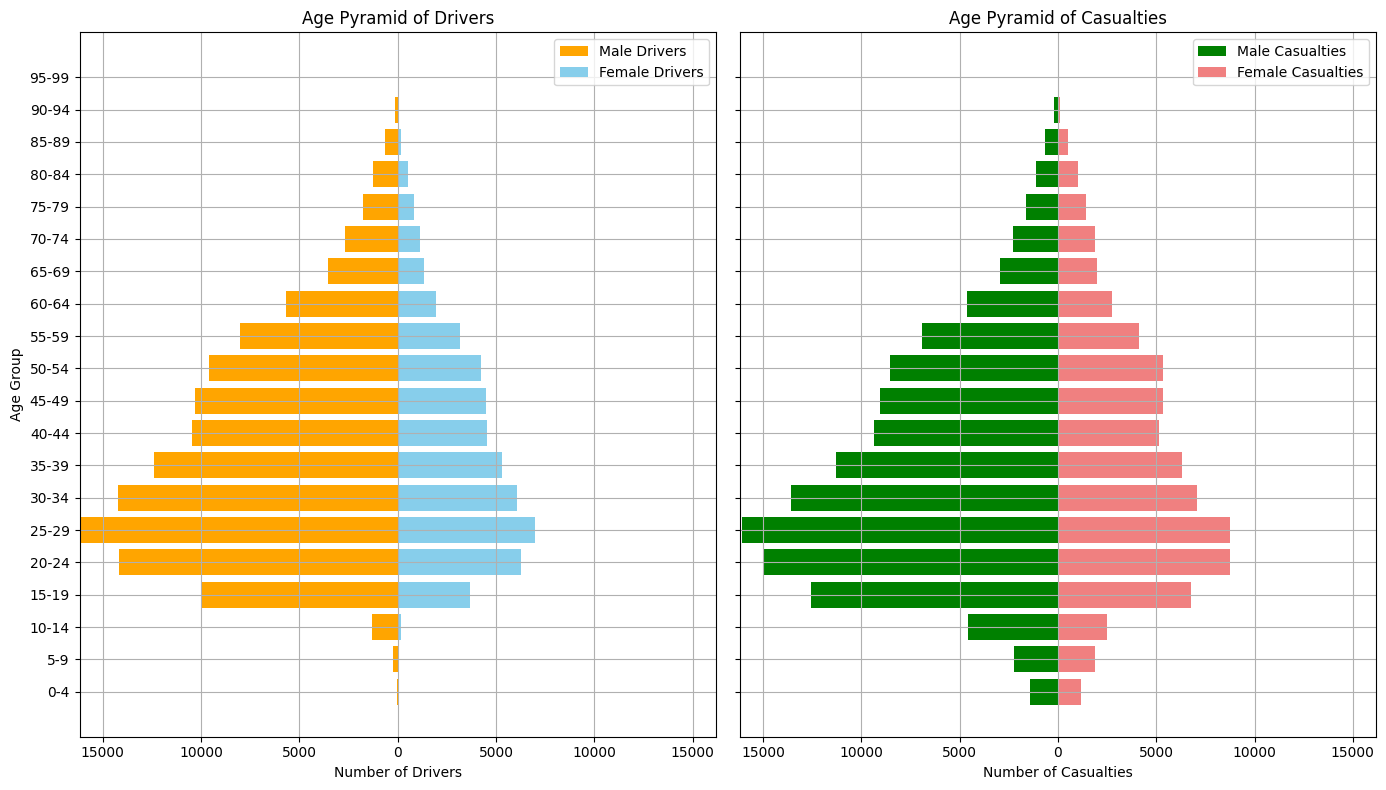

In [32]:
df = accidentDataFrame.copy()

# Define the bins for age groups
age_bins = range(0, 101, 5)  # Binning ages into 5-year intervals
age_labels = [f'{i}-{i+4}' for i in age_bins[:-1]]

# Bin ages and count occurrences in each bin, separated by gender
driver_age_gender = df.dropna(subset=['age_of_driver', 'sex_of_driver'])
driver_age_gender['age_group'] = pd.cut(driver_age_gender['age_of_driver'], bins=age_bins, labels=age_labels)
driver_age_gender_counts = driver_age_gender.groupby(['age_group', 'sex_of_driver']).size().unstack().fillna(0)

casualty_age_gender = df.dropna(subset=['age_of_casualty', 'sex_of_casualty'])
casualty_age_gender['age_group'] = pd.cut(casualty_age_gender['age_of_casualty'], bins=age_bins, labels=age_labels)
casualty_age_gender_counts = casualty_age_gender.groupby(['age_group', 'sex_of_casualty']).size().unstack().fillna(0)

# Ensure both have the same age groups (necessary if some age groups are missing in one of the sets)
driver_age_gender_counts = driver_age_gender_counts.reindex(age_labels, fill_value=0)
casualty_age_gender_counts = casualty_age_gender_counts.reindex(age_labels, fill_value=0)

# Plotting
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(14, 8))

# Plot the driver age pyramid
axes[0].barh(driver_age_gender_counts.index, -driver_age_gender_counts[1], color='orange', label='Male Drivers')
axes[0].barh(driver_age_gender_counts.index, driver_age_gender_counts[2], color='skyblue', label='Female Drivers')
axes[0].set_xlabel('Number of Drivers')
axes[0].set_ylabel('Age Group')
axes[0].set_title('Age Pyramid of Drivers')
axes[0].legend()
axes[0].grid(True)

# Plot the casualty age pyramid
axes[1].barh(casualty_age_gender_counts.index, -casualty_age_gender_counts[1], color='green', label='Male Casualties')
axes[1].barh(casualty_age_gender_counts.index, casualty_age_gender_counts[2], color='lightcoral', label='Female Casualties')
axes[1].set_xlabel('Number of Casualties')
axes[1].set_title('Age Pyramid of Casualties')
axes[1].legend()
axes[1].grid(True)

# Invert y-axis to have younger ages at the bottom
axes[0].invert_yaxis()
axes[1].invert_yaxis()

# Adjust x-axis to show positive values on both sides
for ax in axes:
    ax.set_xlim(-max(driver_age_gender_counts.max().max(), casualty_age_gender_counts.max().max()),
                max(driver_age_gender_counts.max().max(), casualty_age_gender_counts.max().max()))

# Remove negative sign on x-tick labels
for ax in axes:
    labels = [abs(int(label)) for label in ax.get_xticks()]
    ax.set_xticklabels(labels)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


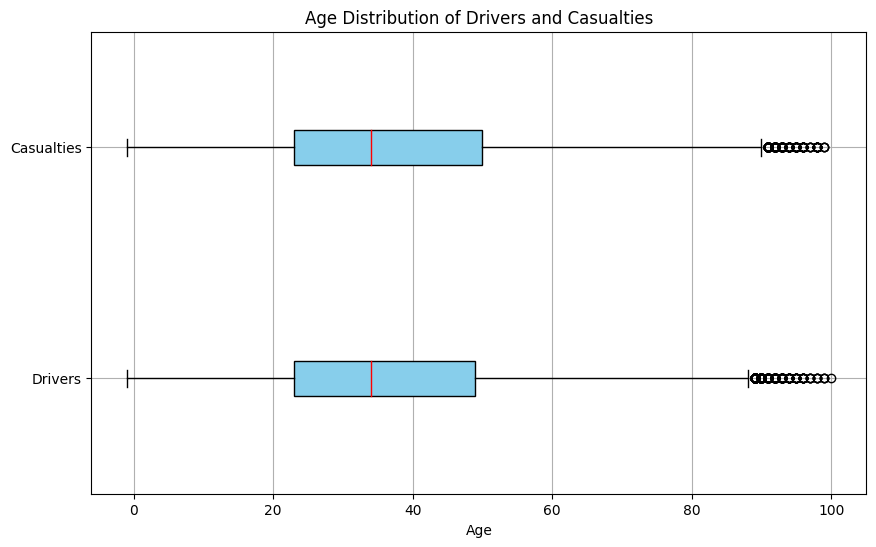

In [33]:
df = accidentDataFrame.copy()

# Prepare data for box plot
data_to_plot = [df['age_of_driver'].dropna(), df['age_of_casualty'].dropna()]

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, vert=False, labels=['Drivers', 'Casualties'], patch_artist=True,
            boxprops=dict(facecolor='skyblue', color='black'), medianprops=dict(color='red'))

plt.xlabel('Age')
plt.title('Age Distribution of Drivers and Casualties')
plt.grid(True)
plt.show()


### *1. Are there significant hours of the day, and days of the week, on which accidents occur?*

In [34]:
def add_thousand_separator(number):
    # Convert the number to a string with thousand separators
    formatted_number = "{:,.0f}".format(number)
    return formatted_number

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
def get_12_hour_time(hour):
    period = 'AM' if hour < 12 else 'PM'
    hour_12 = hour % 12 or 12
    return f"{hour_12:02}:00 {period}"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
def get_day_of_week_name(day_number):
    days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    return days_of_week[day_number - 1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
# **Function to plot significnt hours of day chart and return a dataframe**

def plot_significant_hours_accidents_by_category_horizontal(query, title):
    # Connect to the SQLite database
    with sqlite3.connect(fileURL) as conn:
        # Load data into a Pandas DataFrame
        accidentDataFrame = pd.read_sql_query(query, conn)

        # Create a horizontal bar chart using Plotly Express
        fig = px.bar(accidentDataFrame, x='hour_of_day', y='highest_hour_of_day_count',
                     color='highest_hour_of_day_count', color_continuous_scale='Rainbow',
                     title=title, labels={'hour_of_day': 'Hour of Day', 'highest_hour_of_day_count': 'Accident Count'},
                     orientation='v')  # Set orientation to vertical

        # Customize x-axis tick labels
        fig.update_xaxes(tickvals=list(accidentDataFrame['hour_of_day']),
                         ticktext=[f'{hour:02}:00' for hour in accidentDataFrame['hour_of_day']])

        # Set white background color
        fig.update_layout(plot_bgcolor='white')

        # Adjust the figure size to provide more space for bins
        fig.update_layout(height=600, width=800)

        # Show the plot
        fig.show()

        return accidentDataFrame


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# **Function to plot significnt day of the week chart and return a dataframe**

def plot_significant_day_of_week_accidents_by_category(query, title):
    # Connect to the SQLite database
    with sqlite3.connect(fileURL) as connect:
        # Load data into a Pandas DataFrame
        accidentDataFrame = pd.read_sql_query(query, connect)

        # Create a horizontal bar chart using Plotly Express
        fig = px.bar(accidentDataFrame, y='highest_day_of_week_count', x='day_of_week', orientation='v',
                     color='highest_day_of_week_count', color_continuous_scale='Rainbow',
                     title=title,
                     labels={'day_of_week': 'Day of the Week', 'highest_day_of_week_count': 'Accident Count'})

        # Customize y-axis tick labels
        fig.update_xaxes(tickvals=list(range(1, 8)),
                         ticktext=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

        # Set white background color
        fig.update_layout(plot_bgcolor='white')

        # Show the plot
        fig.show()

        return accidentDataFrame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**1a. Are there significant hours of the day on which accidents occur?**

In [39]:
# SQL query to check and retrieve for significance hours of the day accident occur and then plot
query = """
SELECT
    CAST(strftime('%H', time) AS INTEGER) AS hour_of_day,
    COUNT(*) AS highest_hour_of_day_count
FROM
    accident
WHERE
    accident_year = 2020
GROUP BY hour_of_day, CAST(strftime('%H', time) AS INTEGER)
ORDER BY hour_of_day
"""
df = plot_significant_hours_accidents_by_category_horizontal(query, "Accidents by hours of day")

# Finding the hour with the highest count
highest_hour = df.loc[df['highest_hour_of_day_count'].idxmax()]['hour_of_day']
highest_count = df['highest_hour_of_day_count'].max()

# Print the hours with the highest count
print(f"The significant hour when accidents occur is {get_12_hour_time(highest_hour)} ( {highest_hour:02}:00) with an accident count of {add_thousand_separator(highest_count)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The significant hour when accidents occur is 05:00 PM ( 17:00) with an accident count of 7,813


**1b. Are there significant days of the week, on which accidents occur?**

In [40]:
# SQL query to check and retrieve for significance days of the week accident occur and then plot
query = '''
SELECT
    day_of_week,
    COUNT(*) AS highest_day_of_week_count
FROM
    accident
WHERE
    accident_year = 2020
GROUP BY day_of_week
ORDER BY day_of_week
'''
df = plot_significant_day_of_week_accidents_by_category(query, "Accidents by day of the Week")
# Finding the day or days with the highest count
highest_day_of_week = df.loc[df['highest_day_of_week_count'].idxmax()]['day_of_week']
highest_count = df['highest_day_of_week_count'].max()

# Print days with the highest accident count
print(f"The significant day of the week when accidents occur is {get_day_of_week_name(highest_day_of_week)} with an accident count of {add_thousand_separator(highest_count)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The significant day of the week when accidents occur is Friday with an accident count of 14,889


### *2. For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on:*

**Motorcycle 125cc and under,**

**Motorcycle over 125cc and up to 500cc, and**

**Motorcycle over 500cc.**

**2a. i) The significant hours of the day, on which accidents occur, focusing on: Motorcycle 125cc and under,(vehicle types 2 and 3)**

In [41]:
# SQL query to retrieve data
query = """
SELECT
    CAST(strftime('%H', time) AS INTEGER) AS hour_of_day,
    COUNT(*) AS highest_hour_of_day_count
FROM
    accident
    INNER JOIN vehicle ON accident.accident_index = vehicle.accident_index
WHERE
    accident.accident_year = 2020
    AND vehicle.vehicle_type IN (2, 3)
GROUP BY hour_of_day
ORDER BY hour_of_day
"""

df = plot_significant_hours_accidents_by_category_horizontal(query,"Accidents by hour of day for Motorcycle 125cc and under (vehicle types 2 and 3)")

# Find the hour with the highest count
highest_hour = df.loc[df['highest_hour_of_day_count'].idxmax()]['hour_of_day']
highest_count = df['highest_hour_of_day_count'].max()

print(f"The significant hour when accidents occur for Motorcycle 125cc and under is {get_12_hour_time(highest_hour)}({highest_hour:02}:00) with an accident count of {add_thousand_separator(highest_count)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The significant hour when accidents occur for Motorcycle 125cc and under is 06:00 PM(18:00) with an accident count of 806


**2a. ii) The significant days of the week on which accidents occur, focusing on: Motorcycle 125cc and under,(vehicle types 2 and 3)**

In [42]:
# SQL query to retrieve data
query = """
SELECT
    day_of_week,
    COUNT(*) AS highest_day_of_week_count
FROM
    accident
INNER JOIN vehicle ON accident.accident_index = vehicle.accident_index
WHERE
accident.accident_year = 2020
AND vehicle.vehicle_type IN (2, 3)
GROUP BY day_of_week
ORDER BY day_of_week
"""

df = plot_significant_day_of_week_accidents_by_category(query, "Accidents by day of the Week for Motorcycle 125cc and under (vehicle types 2 and 3)")

# Find the hour with the highest count
highest_day_of_week = df.loc[df['highest_day_of_week_count'].idxmax()]['day_of_week']
highest_count = df['highest_day_of_week_count'].max()

print(f"The significant day of the week when accidents occur for Motorcycle 125cc and under is {get_day_of_week_name(highest_day_of_week)} with an accident count of {add_thousand_separator(highest_count)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The significant day of the week when accidents occur for Motorcycle 125cc and under is Friday with an accident count of 1,474


**2b. i) The significant hours of the day on which accidents occur, focusing on: Motorcycle over 125cc and up to 500cc,(vehicle types 4)**


In [43]:
# SQL query to retrieve data
query = """
SELECT
    CAST(strftime('%H', time) AS INTEGER) AS hour_of_day,
    COUNT(*) AS highest_hour_of_day_count
FROM
    accident
    INNER JOIN vehicle ON accident.accident_index = vehicle.accident_index
WHERE
    accident.accident_year = 2020
    AND vehicle.vehicle_type = 4
GROUP BY hour_of_day
ORDER BY hour_of_day
"""

df = plot_significant_hours_accidents_by_category_horizontal(query,"Accidents by hour of day for Motorcycle over 125cc and up to 500cc (vehicle types 4)")

# Find the hour with the highest count
highest_hour = df.loc[df['highest_hour_of_day_count'].idxmax()]['hour_of_day']
highest_count = df['highest_hour_of_day_count'].max()

print(f"The significant hour when accidents occur for Motorcycle over 125cc and up to 500cc is {highest_hour:02}:00 or {get_12_hour_time(highest_hour)} with an accident count of {add_thousand_separator(highest_count)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The significant hour when accidents occur for Motorcycle over 125cc and up to 500cc is 17:00 or 05:00 PM with an accident count of 175


**2b. ii) The significant days of the week on which accidents occur, focusing on: Motorcycle over 125cc and up to 500cc,(vehicle types 4)**

In [44]:
# SQL query to retrieve data
query = """
SELECT
    day_of_week,
    COUNT(*) AS highest_day_of_week_count
FROM
    accident
INNER JOIN vehicle ON accident.accident_index = vehicle.accident_index
WHERE
accident.accident_year = 2020
AND vehicle.vehicle_type = 4
GROUP BY day_of_week
ORDER BY day_of_week
"""

df = plot_significant_day_of_week_accidents_by_category(query, "Accidents by day of the Week for Motorcycle over 125cc and up to 500cc (vehicle types 4)")

# Find the hour with the highest count
highest_day_of_week = df.loc[df['highest_day_of_week_count'].idxmax()]['day_of_week']
highest_count = df['highest_day_of_week_count'].max()

print(f"The significant day of the week when accidents occur for Motorcycle 125cc and up to 500cc is {get_day_of_week_name(highest_day_of_week)} with an accident count of {add_thousand_separator(highest_count)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The significant day of the week when accidents occur for Motorcycle 125cc and up to 500cc is Friday with an accident count of 267


**2c. i) The significant hours of the day on which accidents occur, focusing on: Motorcycle over 500cc,(vehicle types 5)**

In [45]:
# SQL query to retrieve data
query = """
SELECT
    CAST(strftime('%H', time) AS INTEGER) AS hour_of_day,
    COUNT(*) AS highest_hour_of_day_count
FROM
    accident
    INNER JOIN vehicle ON accident.accident_index = vehicle.accident_index
WHERE
    accident.accident_year = 2020
    AND vehicle.vehicle_type = 5
GROUP BY hour_of_day
ORDER BY hour_of_day
"""

df = plot_significant_hours_accidents_by_category_horizontal(query,"Accidents by hour of day for Motorcycle over 500cc (vehicle types 5)")

# Find the hour with the highest count
highest_hour = df.loc[df['highest_hour_of_day_count'].idxmax()]['hour_of_day']
highest_count = df['highest_hour_of_day_count'].max()

print(f"The significant hour when accidents occur for Motorcycle over 500cc is {highest_hour:02}:00 or {get_12_hour_time(highest_hour)} with an accident count of {add_thousand_separator(highest_count)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The significant hour when accidents occur for Motorcycle over 500cc is 17:00 or 05:00 PM with an accident count of 421


**2c. ii) The significant days of the week on which accidents occur, focusing on: Motorcycle over 500cc,(vehicle types 5)**


In [46]:
# SQL query to retrieve data
query = """
SELECT
    day_of_week,
    COUNT(*) AS highest_day_of_week_count
FROM
    accident
INNER JOIN vehicle ON accident.accident_index = vehicle.accident_index
WHERE
accident.accident_year = 2020
AND vehicle.vehicle_type = 5
GROUP BY day_of_week
ORDER BY day_of_week
"""

df = plot_significant_day_of_week_accidents_by_category(query, "Accidents by day of the Week for Motorcycle over 500cc (vehicle types 5)")

# Find the hour with the highest count
highest_day_of_week = df.loc[df['highest_day_of_week_count'].idxmax()]['day_of_week']
highest_count = df['highest_day_of_week_count'].max()

print(f"The significant day of the week when accidents occur for Motorcycle over 500cc is {get_day_of_week_name(highest_day_of_week)} with an accident count of {add_thousand_separator(highest_count)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The significant day of the week when accidents occur for Motorcycle over 500cc is Sunday with an accident count of 675


### *3. For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?*

**3a. For pedestrians involved in accidents, are there significant hours of the day on which they are more likely to be involved?**

In [47]:
# SQL query to retrieve data
query = """
SELECT CAST
    ( strftime( '%H', time ) AS INTEGER ) AS hour_of_day,
    COUNT( * ) AS highest_hour_of_day_count
FROM
accident
    INNER JOIN casualty ON accident.accident_index = casualty.accident_index
WHERE
    accident.accident_year = 2020
    AND casualty.casualty_class = 3
GROUP BY
    hour_of_day
ORDER BY
    hour_of_day
"""

df = plot_significant_hours_accidents_by_category_horizontal(query,"Accidents by hour of day for pedestrians involved (casualty class = 3)")

# Find the hour with the highest count
highest_hour = df.loc[df['highest_hour_of_day_count'].idxmax()]['hour_of_day']
highest_count = df['highest_hour_of_day_count'].max()

print(f"The significant hour when accidents occur for pedestrians involved is {get_12_hour_time(highest_hour)}({highest_hour:02}:00) with an accident count of {add_thousand_separator(highest_count)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The significant hour when accidents occur for pedestrians involved is 03:00 PM(15:00) with an accident count of 1,672


**3b. For pedestrians involved in accidents, are there significant days of the week, on which they are more likely to be involved?**

In [48]:
# SQL query to retrieve data
query = """
SELECT
    day_of_week,
    COUNT(*) AS highest_day_of_week_count
FROM
    accident
INNER JOIN casualty ON accident.accident_index = casualty.accident_index
WHERE
    accident.accident_year = 2020
    AND casualty.casualty_class = 3
GROUP BY day_of_week
ORDER BY day_of_week
"""

df = plot_significant_day_of_week_accidents_by_category(query, "Accidents by day of the week for pedestrians (casualty class = 3)")

# Find the hour with the highest count
highest_day_of_week = df.loc[df['highest_day_of_week_count'].idxmax()]['day_of_week']
highest_count = df['highest_day_of_week_count'].max()

print(f"The significant day of the week when accidents occur for pedestrians involved is {get_day_of_week_name(highest_day_of_week)} with an accident count of {add_thousand_separator(highest_count)}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The significant day of the week when accidents occur for pedestrians involved is Friday with an accident count of 2,543


### *4. Using the apriori algorithm, explore the impact of selected variables on accident severity.*

**4   Using the apriori algorithm, explore the impact of selected variables on accident severity.**

In [49]:
# Define the selected variable
selectedVariable = ["accident_severity", "light_conditions", "weather_conditions",
                   "road_surface_conditions", "speed_limit"]

# Query to retrieve data
query = f'''
    SELECT {', '.join(selectedVariable)}
    FROM accident
    WHERE accident_year = 2020
'''

# Read the data into a Pandas DataFrame
accidentSeverityDF = pd.read_sql_query(query, connect)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [50]:
accidentSeverity = pd.get_dummies(accidentSeverityDF.accident_severity, prefix="severity")
accidentSeverity.astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



severity_1  severity_2  severity_3
0               0           0           1
1               0           0           1
2               0           0           1
3               0           1           0
4               0           0           1
...           ...         ...         ...
91194           0           1           0
91195           0           0           1
91196           0           1           0
91197           0           0           1
91198           0           0           1

[91199 rows x 3 columns]

In [51]:
lightConditions = pd.get_dummies(accidentSeverityDF.light_conditions, prefix="light").astype(int)
lightConditions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



light_-1  light_1  light_4  light_5  light_6  light_7
0             0        1        0        0        0        0
1             0        1        0        0        0        0
2             0        0        1        0        0        0
3             0        0        1        0        0        0
4             0        0        1        0        0        0
...         ...      ...      ...      ...      ...      ...
91194         0        1        0        0        0        0
91195         0        1        0        0        0        0
91196         0        1        0        0        0        0
91197         0        1        0        0        0        0
91198         0        1        0        0        0        0

[91199 rows x 6 columns]

**The column light_-1 in the one-hot encoded result represents an encoded value for a category that might not have been explicitly mentioned in the stats19 template provided. To remove the "light_-1" column from the result of one-hot encoding using pd.get_dummies, you can simply drop that column using the drop method. Here's how you can do it:**

In [52]:
lightConditions = lightConditions.drop(columns=['light_-1'], axis=1).astype(int)
lightConditions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



light_1  light_4  light_5  light_6  light_7
0            1        0        0        0        0
1            1        0        0        0        0
2            0        1        0        0        0
3            0        1        0        0        0
4            0        1        0        0        0
...        ...      ...      ...      ...      ...
91194        1        0        0        0        0
91195        1        0        0        0        0
91196        1        0        0        0        0
91197        1        0        0        0        0
91198        1        0        0        0        0

[91199 rows x 5 columns]

In [53]:
weatherConditions = pd.get_dummies(accidentSeverityDF.weather_conditions, prefix="weather").astype(int)
weatherConditions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



weather_-1  weather_1  weather_2  weather_3  weather_4  weather_5  \
0               0          0          0          0          0          0   
1               0          1          0          0          0          0   
2               0          1          0          0          0          0   
3               0          1          0          0          0          0   
4               0          1          0          0          0          0   
...           ...        ...        ...        ...        ...        ...   
91194           0          1          0          0          0          0   
91195           0          1          0          0          0          0   
91196           0          1          0          0          0          0   
91197           0          1          0          0          0          0   
91198           0          1          0          0          0          0   

       weather_6  weather_7  weather_8  weather_9  
0              0          0          0          1  
1              0          0          0          0  
2              0          0          0          0  
3              0          0          0          0  
4              0          0          0          0  
...          ...        ...        ...        ...  
91194          0          0          0          0  
91195          0          0          0          0  
91196          0          0          0          0  
91197          0          0          0          0  
91198          0          0          0          0  

[91199 rows x 10 columns]

**Similarly, drop weather_-1, an anomaly in the dataset that doesnt belong in the template having weather 1 - 9**

In [54]:
weatherConditions = weatherConditions.drop(columns=['weather_-1'], axis=1).astype(int)
weatherConditions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



weather_1  weather_2  weather_3  weather_4  weather_5  weather_6  \
0              0          0          0          0          0          0   
1              1          0          0          0          0          0   
2              1          0          0          0          0          0   
3              1          0          0          0          0          0   
4              1          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
91194          1          0          0          0          0          0   
91195          1          0          0          0          0          0   
91196          1          0          0          0          0          0   
91197          1          0          0          0          0          0   
91198          1          0          0          0          0          0   

       weather_7  weather_8  weather_9  
0              0          0          1  
1              0          0          0  
2              0          0          0  
3              0          0          0  
4              0          0          0  
...          ...        ...        ...  
91194          0          0          0  
91195          0          0          0  
91196          0          0          0  
91197          0          0          0  
91198          0          0          0  

[91199 rows x 9 columns]

In [55]:
roadSurfaceConditions = pd.get_dummies(accidentSeverityDF.road_surface_conditions, prefix="road_surface")
roadSurfaceConditions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



road_surface_-1  road_surface_1  road_surface_2  road_surface_3  \
0                False           False           False           False   
1                False            True           False           False   
2                False           False            True           False   
3                False            True           False           False   
4                False            True           False           False   
...                ...             ...             ...             ...   
91194            False            True           False           False   
91195            False            True           False           False   
91196            False            True           False           False   
91197            False            True           False           False   
91198            False            True           False           False   

       road_surface_4  road_surface_5  road_surface_9  
0               False           False            True  
1               False           False           False  
2               False           False           False  
3               False           False           False  
4               False           False           False  
...               ...             ...             ...  
91194           False           False           False  
91195           False           False           False  
91196           False           False           False  
91197           False           False           False  
91198           False           False           False  

[91199 rows x 7 columns]

**Drop road_surface_-1 and road_surface_9, another anomaly in the dataset that doesnt belong in the template**

In [56]:
roadSurfaceConditions = roadSurfaceConditions.drop(columns=['road_surface_-1', 'road_surface_9'], axis=1)
roadSurfaceConditions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



road_surface_1  road_surface_2  road_surface_3  road_surface_4  \
0               False           False           False           False   
1                True           False           False           False   
2               False            True           False           False   
3                True           False           False           False   
4                True           False           False           False   
...               ...             ...             ...             ...   
91194            True           False           False           False   
91195            True           False           False           False   
91196            True           False           False           False   
91197            True           False           False           False   
91198            True           False           False           False   

       road_surface_5  
0               False  
1               False  
2               False  
3               False  
4               False  
...               ...  
91194           False  
91195           False  
91196           False  
91197           False  
91198           False  

[91199 rows x 5 columns]

In [57]:
speedLimit = pd.get_dummies(accidentSeverityDF.speed_limit, prefix="speed_limit")
speedLimit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



speed_limit_-1  speed_limit_20  speed_limit_30  speed_limit_40  \
0               False            True           False           False   
1               False            True           False           False   
2               False           False            True           False   
3               False           False            True           False   
4               False           False            True           False   
...               ...             ...             ...             ...   
91194           False           False            True           False   
91195           False           False            True           False   
91196           False           False           False           False   
91197           False           False            True           False   
91198           False           False            True           False   

       speed_limit_50  speed_limit_60  speed_limit_70  
0               False           False           False  
1               False           False           False  
2               False           False           False  
3               False           False           False  
4               False           False           False  
...               ...             ...             ...  
91194           False           False           False  
91195           False           False           False  
91196           False            True           False  
91197           False           False           False  
91198           False           False           False  

[91199 rows x 7 columns]

**Drop seped_limit_-1 still another anomaly in the dataset that doesnt belong**

In [58]:
speedLimit = speedLimit.drop(columns=['speed_limit_-1'], axis=1)
speedLimit

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



speed_limit_20  speed_limit_30  speed_limit_40  speed_limit_50  \
0                True           False           False           False   
1                True           False           False           False   
2               False            True           False           False   
3               False            True           False           False   
4               False            True           False           False   
...               ...             ...             ...             ...   
91194           False            True           False           False   
91195           False            True           False           False   
91196           False           False           False           False   
91197           False            True           False           False   
91198           False            True           False           False   

       speed_limit_60  speed_limit_70  
0               False           False  
1               False           False  
2               False           False  
3               False           False  
4               False           False  
...               ...             ...  
91194           False           False  
91195           False           False  
91196            True           False  
91197           False           False  
91198           False           False  

[91199 rows x 6 columns]

In [59]:
# Merge all one-hot encoded DataFrames
mergedAccidentSeverityDataFrame = pd.concat([accidentSeverity, lightConditions, weatherConditions,
                       roadSurfaceConditions, speedLimit], axis=1)
mergedAccidentSeverityDataFrame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



severity_1  severity_2  severity_3  light_1  light_4  light_5  light_6  \
0           False       False        True        1        0        0        0   
1           False       False        True        1        0        0        0   
2           False       False        True        0        1        0        0   
3           False        True       False        0        1        0        0   
4           False       False        True        0        1        0        0   
...           ...         ...         ...      ...      ...      ...      ...   
91194       False        True       False        1        0        0        0   
91195       False       False        True        1        0        0        0   
91196       False        True       False        1        0        0        0   
91197       False       False        True        1        0        0        0   
91198       False       False        True        1        0        0        0   

       light_7  weather_1  weather_2  ...  road_surface_2  road_surface_3  \
0            0          0          0  ...           False           False   
1            0          1          0  ...           False           False   
2            0          1          0  ...            True           False   
3            0          1          0  ...           False           False   
4            0          1          0  ...           False           False   
...        ...        ...        ...  ...             ...             ...   
91194        0          1          0  ...           False           False   
91195        0          1          0  ...           False           False   
91196        0          1          0  ...           False           False   
91197        0          1          0  ...           False           False   
91198        0          1          0  ...           False           False   

       road_surface_4  road_surface_5  speed_limit_20  speed_limit_30  \
0               False           False            True           False   
1               False           False            True           False   
2               False           False           False            True   
3               False           False           False            True   
4               False           False           False            True   
...               ...             ...             ...             ...   
91194           False           False           False            True   
91195           False           False           False            True   
91196           False           False           False           False   
91197           False           False           False            True   
91198           False           False           False            True   

       speed_limit_40  speed_limit_50  speed_limit_60  speed_limit_70  
0               False           False           False           False  
1               False           False           False           False  
2               False           False           False           False  
3               False           False           False           False  
4               False           False           False           False  
...               ...             ...             ...             ...  
91194           False           False           False           False  
91195           False           False           False           False  
91196           False           False            True           False  
91197           False           False           False           False  
91198           False           False           False           False  

[91199 rows x 28 columns]

In [60]:
# Run Apriori Algorithm
min_support = 0.2  # Adjust when required
min_confidence = 0.7  # Adjust when required
frequentItemSets = apriori(mergedAccidentSeverityDataFrame, min_support=min_support, use_colnames=True)
rules = association_rules(frequentItemSets, metric="confidence", min_threshold=min_confidence)


# Define a function to display formatted rules in a tabulated format
def display_tabulated_rules(dataframe):
    display(HTML(tabulate(dataframe, headers='keys', tablefmt='html')))


# Filter rules with a one-to-one relationship and containing 'severity_'
filtered_rules_one_to_one = rules[
    (
        (rules['antecedents'].apply(lambda x: len(x) == 1 and any('severity_' in item for item in x))) &
        (rules['consequents'].apply(lambda x: len(x) == 1))
    ) |
    (
        (rules['consequents'].apply(lambda x: len(x) == 1 and any('severity_' in item for item in x))) &
        (rules['antecedents'].apply(lambda x: len(x) == 1))
    )
]

# Order the rules by high lift and conviction values
sorted_rules_one_to_one = filtered_rules_one_to_one.sort_values(by=['lift', 'conviction'], ascending=[False, False])

# Convert frozensets to regular sets for better display
sorted_rules_one_to_one['antecedents'] = sorted_rules_one_to_one['antecedents'].apply(lambda x: next(iter(x)) if x else None)
sorted_rules_one_to_one['consequents'] = sorted_rules_one_to_one['consequents'].apply(lambda x: next(iter(x)) if x else None)

# Display the formatted rules for one-to-one relationship
print("Filtered and sorted rules with a relationship which contains 'severity_':")
display_tabulated_rules(sorted_rules_one_to_one.head(5))


# Filter rules involving a many-to-many relationship and containing 'severity_'
filtered_rules = rules[
    (rules['antecedents'].apply(lambda x: any('severity_' in item for item in x))) |
    (rules['consequents'].apply(lambda x: any('severity_' in item for item in x)))
]

# Order the rules by high lift and confidence values
sorted_rules =  filtered_rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])

# Convert frozensets to regular sets for better display
sorted_rules['antecedents'] = sorted_rules['antecedents'].apply(list)
sorted_rules['consequents'] = sorted_rules['consequents'].apply(list)

# Display the formatted rules with the new filtering
print("Filtered and sorted rules with a relationship which contains 'severity_':")
display_tabulated_rules(sorted_rules.head(5))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



Filtered and sorted rules with a relationship which contains 'severity_':


Filtered and sorted rules with a relationship which contains 'severity_':


### *5. Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?*

In [61]:
# SQL query
query = """
    SELECT
        lsoa.lsoa01nm,
        accident.longitude,
        accident.latitude,
        accident.police_force
    FROM
        accident
    INNER JOIN
        lsoa
    ON
        accident.lsoa_of_accident_location = lsoa.lsoa01cd
    WHERE
        accident.accident_year = 2020 AND
        lsoa.lsoa01nm LIKE 'Kingston upon Hull%' OR
        lsoa.lsoa01nm LIKE 'East Riding of Yorkshire%' OR
        accident.police_force = 16

"""

# Read data from the database into a pandas DataFrame
mergedAccidentByRegionDF = pd.read_sql_query(query, connect)


mergedAccidentByRegionDF
# Create a new 'region' column based on conditions
mergedAccidentByRegionDF['region'] = mergedAccidentByRegionDF['lsoa01nm'].copy()

# Replace regions where accident.police_force = 16 and lsoa.lsoa01nm <> Kingston upon Hull% and lsoa.lsoa01nm <> East Riding of Yorkshire% with "Humberside"
mergedAccidentByRegionDF.loc[
    (mergedAccidentByRegionDF['lsoa01nm'].str.startswith('Kingston upon Hull') == False) &
    (mergedAccidentByRegionDF['lsoa01nm'].str.startswith('East Riding of Yorkshire') == False) &
    (mergedAccidentByRegionDF['police_force'] == 16),
    'region'
] = 'Humberside'

# Replace regions LIKE 'Kingston upon Hull%' with 'Kingston upon Hull'
mergedAccidentByRegionDF.loc[
    mergedAccidentByRegionDF['lsoa01nm'].str.startswith('Kingston upon Hull'),
    'region'
] = 'Kingston upon Hull'

# Replace regions LIKE 'East Riding of Yorkshire%' with 'East Riding of Yorkshire'
mergedAccidentByRegionDF.loc[
    mergedAccidentByRegionDF['lsoa01nm'].str.startswith('East Riding of Yorkshire'),
    'region'
] = 'East Riding of Yorkshire'


# Print the updated DataFrame
mergedAccidentByRegionDF.drop('police_force', axis=1, inplace=True)
mergedAccidentByRegionDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lsoa01nm  longitude   latitude  \
0           Kingston upon Hull 028C  -0.393435  53.745044   
1     East Riding of Yorkshire 014D  -0.268489  53.862796   
2      North East Lincolnshire 006B  -0.064199  53.567831   
3           North Lincolnshire 013A  -0.561157  53.600017   
4           Kingston upon Hull 029A  -0.354873  53.743082   
...                             ...        ...        ...   
8390        North Lincolnshire 017B  -0.651104  53.566753   
8391  East Riding of Yorkshire 019D  -0.424674  53.839482   
8392        Kingston upon Hull 007C  -0.308880  53.782750   
8393        North Lincolnshire 005A  -0.703181  53.569801   
8394        Kingston upon Hull 029C  -0.342063  53.742609   

                        region  
0           Kingston upon Hull  
1     East Riding of Yorkshire  
2                   Humberside  
3                   Humberside  
4           Kingston upon Hull  
...                        ...  
8390                Humberside  
8391  East Riding of Yorkshire  
8392        Kingston upon Hull  
8393                Humberside  
8394        Kingston upon Hull  

[8395 rows x 4 columns]

In [62]:
# Prepare the data
coordinates = mergedAccidentByRegionDF[['longitude', 'latitude']]
scaler = StandardScaler()
scaled_coordinates = scaler.fit_transform(coordinates)

# Function to calculate the WCSS (Within-Cluster Sum of Square)
def calculate_wcss(data):
    wcss = []
    for n in range(1, 11):
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Function to calculate the silhouette scores
def calculate_silhouette_scores(data):
    silhouette_scores = []
    for n in range(2, 11):
        kmeans = KMeans(n_clusters=n, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores

# Calculate WCSS for different number of clusters
wcss = calculate_wcss(scaled_coordinates)

# Calculate silhouette scores for different number of clusters
silhouette_scores = calculate_silhouette_scores(scaled_coordinates)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



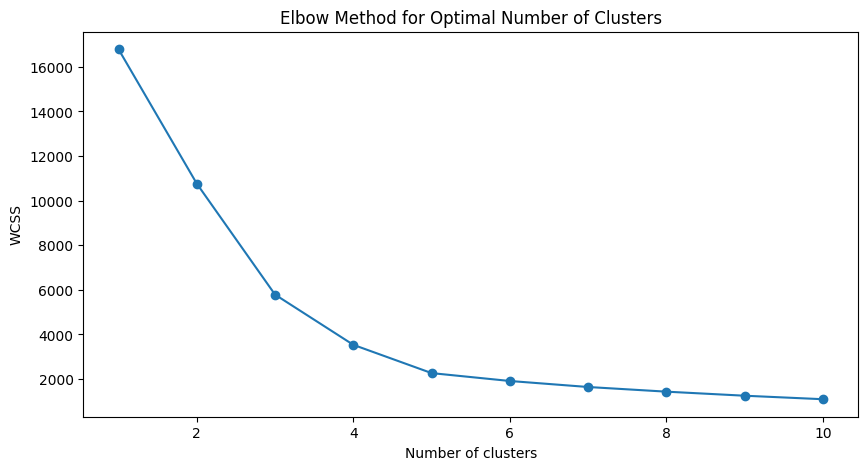

In [63]:

# Plot WCSS to use the Elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



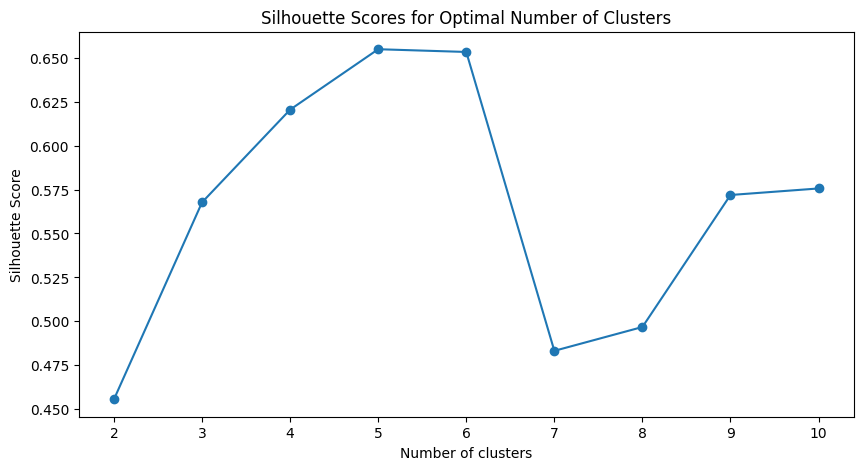

In [64]:

# Plot silhouette scores to determine the optimal number of clusters
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()



In [65]:
# Determine the optimal number of clusters using the Elbow method
def find_elbow_point(wcss):
    diff = np.diff(wcss)
    diff_r = np.diff(diff)
    elbow_point = np.argmin(diff_r) + 1  # +1 due to the diff reducing the index by 1
    return elbow_point

optimal_clusters_elbow = find_elbow_point(wcss)

# Determine the optimal number of clusters using the silhouette scores
optimal_clusters_silhouette = np.argmax(silhouette_scores) + 2  # +2 because range starts from 2

print("Optimal number of clusters (Elbow Method):", optimal_clusters_elbow)
print("Optimal number of clusters (Silhouette Score):", optimal_clusters_silhouette)


Optimal number of clusters (Elbow Method): 8
Optimal number of clusters (Silhouette Score): 5


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



**Gap Statistic ouputs a consistent optimal number of clusters of 5, we will use the Elbow method to confirm the result**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



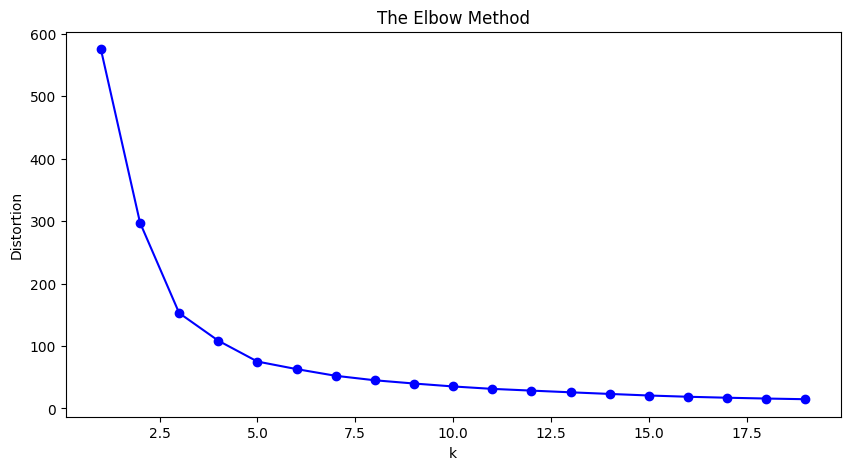

In [66]:
distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(coordinates)
    distortions.append(kmean.inertia_)
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

**Elbow method confirms that 5 clusters can be used as an optimal result**

In [67]:
# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(scaled_coordinates)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [68]:
mergedAccidentByRegionDF['cluster'] = kmeans.labels_
mergedDFKmeans = mergedAccidentByRegionDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [69]:
mergedDFKmeans

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lsoa01nm  longitude   latitude  \
0           Kingston upon Hull 028C  -0.393435  53.745044   
1     East Riding of Yorkshire 014D  -0.268489  53.862796   
2      North East Lincolnshire 006B  -0.064199  53.567831   
3           North Lincolnshire 013A  -0.561157  53.600017   
4           Kingston upon Hull 029A  -0.354873  53.743082   
...                             ...        ...        ...   
8390        North Lincolnshire 017B  -0.651104  53.566753   
8391  East Riding of Yorkshire 019D  -0.424674  53.839482   
8392        Kingston upon Hull 007C  -0.308880  53.782750   
8393        North Lincolnshire 005A  -0.703181  53.569801   
8394        Kingston upon Hull 029C  -0.342063  53.742609   

                        region  cluster  
0           Kingston upon Hull        1  
1     East Riding of Yorkshire        1  
2                   Humberside        2  
3                   Humberside        3  
4           Kingston upon Hull        1  
...                        ...      ...  
8390                Humberside        3  
8391  East Riding of Yorkshire        1  
8392        Kingston upon Hull        1  
8393                Humberside        3  
8394        Kingston upon Hull        1  

[8395 rows x 5 columns]

**Utilize dimensionality reduction techniques to gain insights into how our clusters interrelate within the original high-dimensional space. This approach not only offers visualization benefits but also enables us to examine whether the data features exhibit linear relationships amongst themselves.**

In [70]:
# Select only numeric columns before calculating the mean
mergedDFKmeans.select_dtypes(include='number').groupby('cluster').mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



longitude   latitude
cluster                      
0        -0.306547  54.036271
1        -0.360859  53.762811
2        -0.095894  53.569592
3        -0.635757  53.575206
4        -0.808894  53.799828

In [71]:
mergedDFKmeans

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



lsoa01nm  longitude   latitude  \
0           Kingston upon Hull 028C  -0.393435  53.745044   
1     East Riding of Yorkshire 014D  -0.268489  53.862796   
2      North East Lincolnshire 006B  -0.064199  53.567831   
3           North Lincolnshire 013A  -0.561157  53.600017   
4           Kingston upon Hull 029A  -0.354873  53.743082   
...                             ...        ...        ...   
8390        North Lincolnshire 017B  -0.651104  53.566753   
8391  East Riding of Yorkshire 019D  -0.424674  53.839482   
8392        Kingston upon Hull 007C  -0.308880  53.782750   
8393        North Lincolnshire 005A  -0.703181  53.569801   
8394        Kingston upon Hull 029C  -0.342063  53.742609   

                        region  cluster  
0           Kingston upon Hull        1  
1     East Riding of Yorkshire        1  
2                   Humberside        2  
3                   Humberside        3  
4           Kingston upon Hull        1  
...                        ...      ...  
8390                Humberside        3  
8391  East Riding of Yorkshire        1  
8392        Kingston upon Hull        1  
8393                Humberside        3  
8394        Kingston upon Hull        1  

[8395 rows x 5 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



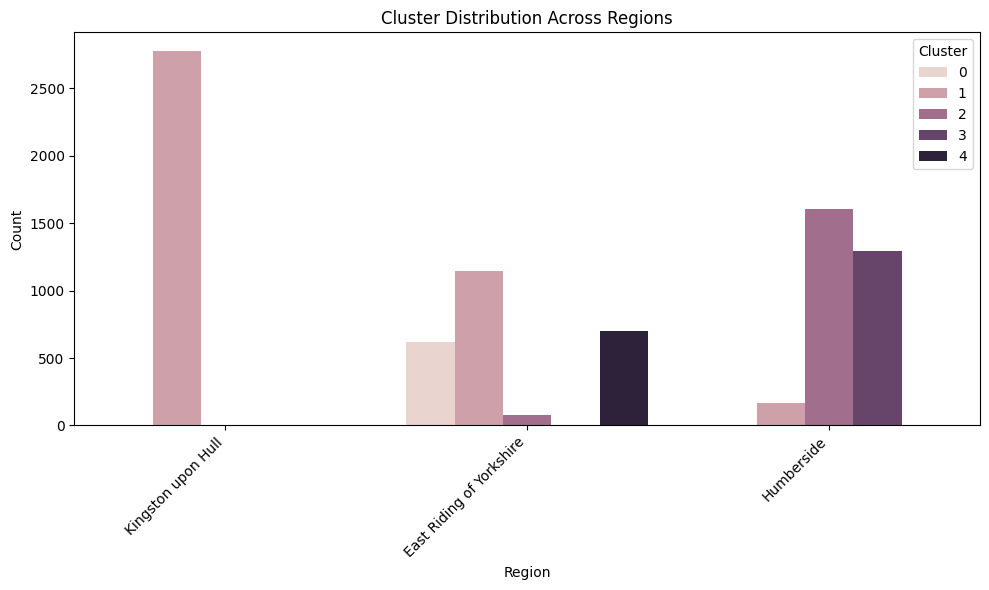

In [72]:
# Visualize the distribution of clusters across regions
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='cluster', data=mergedDFKmeans)
plt.title("Cluster Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [73]:

X = mergedAccidentByRegionDF[['latitude', 'longitude']]

# Instantiate the K-Means object
kmeans = KMeans(n_clusters=5, random_state=0)  # Adjust n_clusters as needed

# Fit the data to the K-Means model
kmeans.fit(X)

# Add the cluster labels to your dataframe
mergedAccidentByRegionDF['cluster'] = kmeans.labels_

# Print the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[54.03598971 -0.29272166]
 [53.58398143 -0.64947215]
 [53.5746709  -0.08883301]
 [53.75699124 -0.36426882]
 [53.8061327  -0.8180069 ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



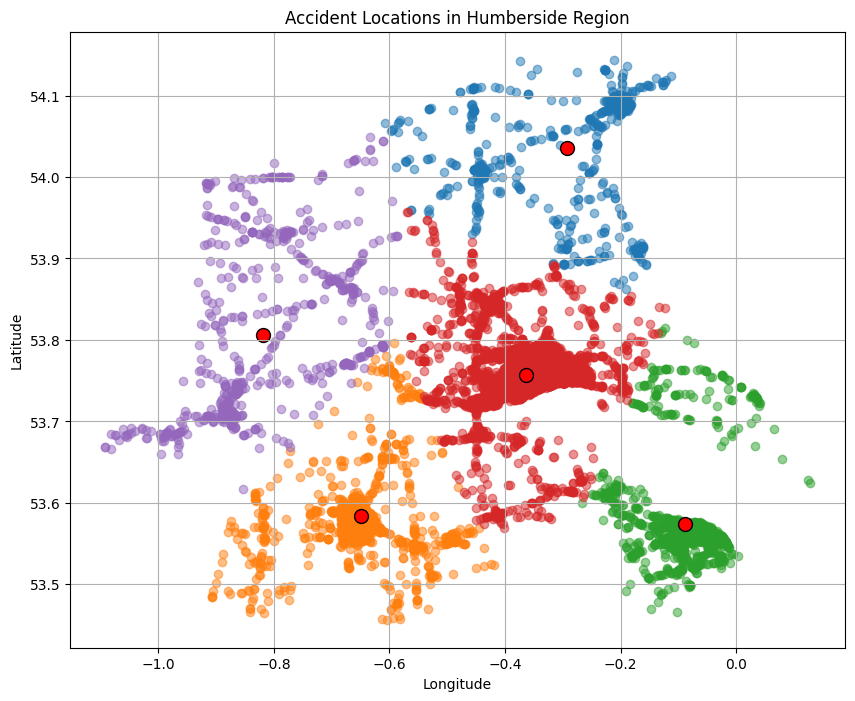

In [74]:
# Assuming your dataframe has columns for latitude and longitude
X = mergedAccidentByRegionDF[['latitude', 'longitude']]

# Instantiate the K-Means object
kmeans = KMeans(n_clusters=5, random_state=0)  # Adjust n_clusters as needed

# Fit the data to the K-Means model
kmeans.fit(X)

# Add the cluster labels to your dataframe
mergedAccidentByRegionDF['cluster'] = kmeans.labels_

# Create a scatter plot of accident locations, colored by cluster
plt.figure(figsize=(10, 8))
for cluster, group in mergedAccidentByRegionDF.groupby('cluster'):
    plt.scatter(group['longitude'], group['latitude'], label=f'Cluster {cluster}', alpha=0.5)

# Add markers for the cluster centers
cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    plt.scatter(center[1], center[0], marker='o', s=100, label=f'Cluster Center {i}', color ='red', edgecolors='k')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Locations in Humberside Region')
# plt.legend()
plt.grid(True)
plt.show()

In [75]:
# Filter for your region
filtered_df = mergedAccidentByRegionDF[
    mergedAccidentByRegionDF['region'].isin(['Kingston upon Hull', 'Humberside', 'East Riding of Yorkshire'])
]

# Define the number of clusters
num_clusters = 5

# KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(filtered_df[['longitude', 'latitude']])
filtered_df['cluster_label'] = kmeans.labels_

# Map visualization using folium
# Replace with your center coordinates (latitude, longitude) for the region
center_lat = 53.7903  # Example: Latitude of Kingston upon Hull
center_lon = -0.3800  # Example: Longitude of Kingston upon Hull
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Define color mapping for clusters
cluster_colors = {0: 'red', 1: 'green', 2: 'blue', 3: 'brown', 4: 'black'}

# Add colored circles for each accident based on cluster labels
for i in range(len(filtered_df)):
    lat = filtered_df.iloc[i]['latitude']
    lon = filtered_df.iloc[i]['longitude']
    cluster = filtered_df.iloc[i]['cluster_label']
    folium.CircleMarker(
        location=[lat, lon],
        radius=3,
        color=cluster_colors[cluster],
        fill=True,
        fill_color=cluster_colors[cluster],
        fill_opacity=0.6
    ).add_to(m)

# Add markers for the cluster centroids
# Define a function to calculate the centroid (average) of a group of points
def get_centroid(group):
  return group[['longitude', 'latitude']].mean()

# Optionally, group data by cluster label for further analysis (commented out)
# grouped_data = filtered_df.groupby('cluster_label')

# Add markers to the map based on cluster centroids
for cluster, data in filtered_df.groupby('cluster_label'):
  centroid = get_centroid(data)  # Calculate centroid for each cluster group
  lat = centroid['latitude']
  lon = centroid['longitude']
  folium.Marker([lat, lon], icon=folium.Icon(color=cluster_colors[cluster])).add_to(m)

# Display the map
m


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
clusterRegionCrossTab = pd.crosstab(mergedAccidentByRegionDF['region'], mergedAccidentByRegionDF['cluster'], margins=True, margins_name='Total')
clusterRegionCrossTab

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



cluster                     0     1     2     3    4  Total
region                                                     
East Riding of Yorkshire  604    73   141  1054  676   2548
Humberside                  0  1198  1539   333    1   3071
Kingston upon Hull          0     0     0  2776    0   2776
Total                     604  1271  1680  4163  677   8395

### USING DBSCAN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



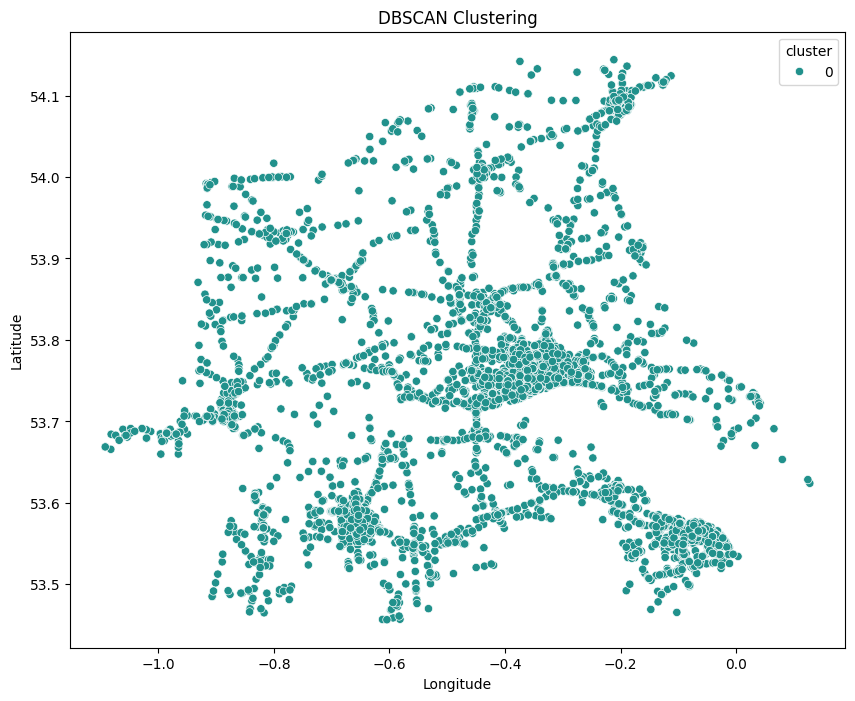

In [77]:
# Assuming you have a DataFrame named 'mergedAccidentByRegionDF' with columns 'longitude', 'latitude'
coords = mergedAccidentByRegionDF[['longitude', 'latitude']].values

# Instantiate the DBSCAN object
dbscan = DBSCAN(eps=0.1, min_samples=10)  # You may need to adjust these parameters

# Fit the DBSCAN model
clusters = dbscan.fit_predict(coords)

# Add the cluster labels to the original DataFrame
mergedAccidentByRegionDF['cluster'] = clusters

# Plot the clusters (optional)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=mergedAccidentByRegionDF, x='longitude', y='latitude', hue='cluster', palette='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### *6. Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?*

**Using the Isolation Forest Outlier Detection on Our Dataframe we can identify the unusual entries in the dataset.**

In [78]:
#create an instance of the model
iforest = IsolationForest(contamination = 0.05)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [79]:
# Provide the SQLite database filename
# db_filename = 'accident_data_v1.0.0_2023.db'

def run_sql_query_and_get_dataframe(query, fileURL):
    # Establish a connection to the SQLite database
    # conn = sqlite3.connect(fileURL)

    # Execute the query and store the results in a DataFrame
    resultDF = pd.read_sql_query(query, connect)

    # Close the database connection
    # connect.close()

    return resultDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [80]:
# Define the SQL query to retrieve accidents for the year 2020
query = """
    SELECT *
    FROM
        accident
    WHERE
        accident.accident_year = 2020
"""
# Call the function and get the DataFrame
accidentDF = run_sql_query_and_get_dataframe(query, fileURL)
# Print the DataFrame
accidentDF.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91185 non-null  float64
 4   location_northing_osgr                       91185 non-null  float64
 5   longitude                                    91185 non-null  float64
 6   latitude                                     91185 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [81]:
# dropping columns with categorical data
accidentDFNew = accidentDF.drop(["accident_severity","accident_index",\
                                    "accident_reference","date","time",\
                                    "local_authority_ons_district",\
                                    "local_authority_highway",\
                                    "lsoa_of_accident_location",], axis = 1)


accidentDFNew

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



accident_year  location_easting_osgr  location_northing_osgr  \
0               2020               521389.0                175144.0   
1               2020               529337.0                176237.0   
2               2020               526432.0                182761.0   
3               2020               538676.0                184371.0   
4               2020               529324.0                181286.0   
...              ...                    ...                     ...   
91194           2020               343034.0                731654.0   
91195           2020               257963.0                658891.0   
91196           2020               383664.0                810646.0   
91197           2020               277161.0                674852.0   
91198           2020               240402.0                681950.0   

       longitude   latitude  police_force  number_of_vehicles  \
0      -0.254001  51.462262             1                   1   
1      -0.139253  51.470327             1                   1   
2      -0.178719  51.529614             1                   1   
3      -0.001683  51.541210             1                   1   
4      -0.137592  51.515704             1                   1   
...          ...        ...           ...                 ...   
91194  -2.926320  56.473539            99                   2   
91195  -4.267565  55.802353            99                   1   
91196  -2.271903  57.186317            99                   2   
91197  -3.968753  55.950940            99                   2   
91198  -4.561040  56.003843            99                   1   

       number_of_casualties  day_of_week  local_authority_district  ...  \
0                         1            3                        10  ...   
1                         2            2                         9  ...   
2                         1            4                         1  ...   
3                         1            4                        17  ...   
4                         2            4                         1  ...   
...                     ...          ...                       ...  ...   
91194                     1            4                       918  ...   
91195                     1            6                       922  ...   
91196                     1            4                       910  ...   
91197                     1            3                       932  ...   
91198                     1            3                       916  ...   

       pedestrian_crossing_human_control  \
0                                      9   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
91194                                  0   
91195                                  0   
91196                                  0   
91197                                  0   
91198                                  0   

       pedestrian_crossing_physical_facilities  light_conditions  \
0                                            9                 1   
1                                            4                 1   
2                                            0                 4   
3                                            4                 4   
4                                            0                 4   
...                                        ...               ...   
91194                                        0                 1   
91195                                        0                 1   
91196                                        0                 1   
91197                                        0                 1   
91198                                        0                 1   

       weather_conditions  road_surface_conditions  \
0                       9                        9   
1                 

In [82]:
missingValues = accidentDFNew.isna()
totalMissing = missingValues.sum().sum()
print("Total missing values Before Removing:", totalMissing)

Total missing values Before Removing: 56


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [83]:
# Remove rows with missing values
accidentDFNew = accidentDFNew.dropna()
accidentDFNew

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



accident_year  location_easting_osgr  location_northing_osgr  \
0               2020               521389.0                175144.0   
1               2020               529337.0                176237.0   
2               2020               526432.0                182761.0   
3               2020               538676.0                184371.0   
4               2020               529324.0                181286.0   
...              ...                    ...                     ...   
91194           2020               343034.0                731654.0   
91195           2020               257963.0                658891.0   
91196           2020               383664.0                810646.0   
91197           2020               277161.0                674852.0   
91198           2020               240402.0                681950.0   

       longitude   latitude  police_force  number_of_vehicles  \
0      -0.254001  51.462262             1                   1   
1      -0.139253  51.470327             1                   1   
2      -0.178719  51.529614             1                   1   
3      -0.001683  51.541210             1                   1   
4      -0.137592  51.515704             1                   1   
...          ...        ...           ...                 ...   
91194  -2.926320  56.473539            99                   2   
91195  -4.267565  55.802353            99                   1   
91196  -2.271903  57.186317            99                   2   
91197  -3.968753  55.950940            99                   2   
91198  -4.561040  56.003843            99                   1   

       number_of_casualties  day_of_week  local_authority_district  ...  \
0                         1            3                        10  ...   
1                         2            2                         9  ...   
2                         1            4                         1  ...   
3                         1            4                        17  ...   
4                         2            4                         1  ...   
...                     ...          ...                       ...  ...   
91194                     1            4                       918  ...   
91195                     1            6                       922  ...   
91196                     1            4                       910  ...   
91197                     1            3                       932  ...   
91198                     1            3                       916  ...   

       pedestrian_crossing_human_control  \
0                                      9   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
...                                  ...   
91194                                  0   
91195                                  0   
91196                                  0   
91197                                  0   
91198                                  0   

       pedestrian_crossing_physical_facilities  light_conditions  \
0                                            9                 1   
1                                            4                 1   
2                                            0                 4   
3                                            4                 4   
4                                            0                 4   
...                                        ...               ...   
91194                                        0                 1   
91195                                        0                 1   
91196                                        0                 1   
91197                                        0                 1   
91198                                        0                 1   

       weather_conditions  road_surface_conditions  \
0                       9                        9   
1                 

In [84]:
# Calculate the total count of missing values in the DataFrame
totalMissingValues = accidentDFNew.isna().sum().sum()

# Print the total count of missing values
print("Total missing values after Removing:", totalMissingValues)

Total missing values after Removing: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [85]:
# Create an Isolation Forest instance
isolationForest = IsolationForest(contamination=0.05)  # Adjust the contamination parameter

# Fit the Isolation Forest model
outliers = isolationForest.fit_predict(accidentDFNew)

# Add the 'outlier' column to the DataFrame
accidentDFNew['outlier'] = outliers
accidentDFNew

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



accident_year  location_easting_osgr  location_northing_osgr  \
0               2020               521389.0                175144.0   
1               2020               529337.0                176237.0   
2               2020               526432.0                182761.0   
3               2020               538676.0                184371.0   
4               2020               529324.0                181286.0   
...              ...                    ...                     ...   
91194           2020               343034.0                731654.0   
91195           2020               257963.0                658891.0   
91196           2020               383664.0                810646.0   
91197           2020               277161.0                674852.0   
91198           2020               240402.0                681950.0   

       longitude   latitude  police_force  number_of_vehicles  \
0      -0.254001  51.462262             1                   1   
1      -0.139253  51.470327             1                   1   
2      -0.178719  51.529614             1                   1   
3      -0.001683  51.541210             1                   1   
4      -0.137592  51.515704             1                   1   
...          ...        ...           ...                 ...   
91194  -2.926320  56.473539            99                   2   
91195  -4.267565  55.802353            99                   1   
91196  -2.271903  57.186317            99                   2   
91197  -3.968753  55.950940            99                   2   
91198  -4.561040  56.003843            99                   1   

       number_of_casualties  day_of_week  local_authority_district  ...  \
0                         1            3                        10  ...   
1                         2            2                         9  ...   
2                         1            4                         1  ...   
3                         1            4                        17  ...   
4                         2            4                         1  ...   
...                     ...          ...                       ...  ...   
91194                     1            4                       918  ...   
91195                     1            6                       922  ...   
91196                     1            4                       910  ...   
91197                     1            3                       932  ...   
91198                     1            3                       916  ...   

       pedestrian_crossing_physical_facilities  light_conditions  \
0                                            9                 1   
1                                            4                 1   
2                                            0                 4   
3                                            4                 4   
4                                            0                 4   
...                                        ...               ...   
91194                                        0                 1   
91195                                        0                 1   
91196                                        0                 1   
91197                                        0                 1   
91198                                        0                 1   

       weather_conditions  road_surface_conditions  \
0                       9                        9   
1                       1                        1   
2                       1                        2   
3                       1                        1   
4                       1                        1   
...                   ...                      ...   
91194                   1                        1   
91195                   1                        1   
91196                   1                        1   
91197                   1                        1   
91198                   1                        1   

      

In [86]:
#filter the dataset to show the predicted outlier
accidentDFNew[accidentDFNew["outlier"]==-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



accident_year  location_easting_osgr  location_northing_osgr  \
0               2020               521389.0                175144.0   
12              2020               553943.0                190802.0   
33              2020               531124.0                189815.0   
37              2020               549043.0                183451.0   
93              2020               531295.0                164906.0   
...              ...                    ...                     ...   
91189           2020               341791.0                733677.0   
91190           2020               342979.0                731116.0   
91192           2020               294074.0                581458.0   
91193           2020               286242.0                717023.0   
91195           2020               257963.0                658891.0   

       longitude   latitude  police_force  number_of_vehicles  \
0      -0.254001  51.462262             1                   1   
12      0.221108  51.595036             1                   2   
33     -0.108489  51.591936             1                   2   
37      0.147310  51.530303             1                   1   
93     -0.115273  51.368046             1                   2   
...          ...        ...           ...                 ...   
91189  -2.946947  56.491558            99                   1   
91190  -2.927095  56.468699            99                   1   
91192  -3.662274  55.116161            99                   2   
91193  -3.841439  56.331864            99                   1   
91195  -4.267565  55.802353            99                   1   

       number_of_casualties  day_of_week  local_authority_district  ...  \
0                         1            3                        10  ...   
12                        2            4                        15  ...   
33                        1            4                        31  ...   
37                        2            4                        16  ...   
93                        1            5                        20  ...   
...                     ...          ...                       ...  ...   
91189                     1            3                       918  ...   
91190                     1            2                       918  ...   
91192                     2            7                       917  ...   
91193                     1            3                       934  ...   
91195                     1            6                       922  ...   

       pedestrian_crossing_physical_facilities  light_conditions  \
0                                            9                 1   
12                                           9                 1   
33                                           9                 4   
37                                           9                 7   
93                                           0                 4   
...                                        ...               ...   
91189                                        0                 1   
91190                                        0                 4   
91192                                        0                 1   
91193                                        0                 1   
91195                                        0                 1   

       weather_conditions  road_surface_conditions  \
0                       9                        9   
12                      7                        1   
33                      9                        9   
37                      7                        1   
93                      8                        2   
...                   ...                      ...   
91189                   9                        2   
91190                   1                        2   
91192                   1                        1   
91193                   2                        2   
91195                   1                        1   

      

In [87]:
# Define the SQL query to retrieve accidents for the year 2020 for the casualty table
query = """
    SELECT *
    FROM
        casualty
    WHERE
        accident_year = 2020
"""
# Call the function and get the DataFrame
casualtyDF = run_sql_query_and_get_dataframe(query, fileURL)
# Print the DataFrame
casualtyDF.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [88]:
# dropping columns with categorical data
casualtyDFNew = casualtyDF.drop(["accident_index",\
                                    "accident_reference"], axis = 1)
casualtyDFNew

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



casualty_index  accident_year  vehicle_reference  casualty_reference  \
0               484748           2020                  1                   1   
1               484749           2020                  1                   1   
2               484750           2020                  1                   2   
3               484751           2020                  1                   1   
4               484752           2020                  1                   1   
...                ...            ...                ...                 ...   
115579          600327           2020                  2                   1   
115580          600328           2020                  1                   1   
115581          600329           2020                  2                   1   
115582          600330           2020                  2                   1   
115583          600331           2020                  1                   1   

        casualty_class  sex_of_casualty  age_of_casualty  \
0                    3                1               31   
1                    3                2                2   
2                    3                2                4   
3                    3                1               23   
4                    3                1               47   
...                ...              ...              ...   
115579               1                1               11   
115580               3                2               63   
115581               1                1               38   
115582               1                1               76   
115583               3                1               48   

        age_band_of_casualty  casualty_severity  pedestrian_location  \
0                          6                  3                    9   
1                          1                  3                    1   
2                          1                  3                    1   
3                          5                  3                    5   
4                          8                  2                    4   
...                      ...                ...                  ...   
115579                     3                  2                    0   
115580                     9                  3                   10   
115581                     7                  2                    0   
115582                    11                  3                    0   
115583                     8                  3                    9   

        pedestrian_movement  car_passenger  bus_or_coach_passenger  \
0                         5              0                       0   
1                         1              0                       0   
2                         1              0                       0   
3                         9              0                       0   
4                         1              0                       0   
...                     ...            ...                     ...   
115579                    0              0                       0   
115580                    1              0                       0   
115581                    0              0                       0   
115582                    0              0                       0   
115583                    9              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                                        0              0   
1                                        0              0   
2                                        0              0   
3                                        0              0   
4                                        0              0   
...                                    ...            ...   
115579                                   0              1   
115580                                   0              0   
115581                                   0              5   
115582    

In [89]:
#normalising the dataset
scaler = StandardScaler()
normalised_data_casualty = scaler.fit_transform(casualtyDFNew)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [90]:
outliers_casualty = iforest.fit_predict(normalised_data_casualty)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [91]:
casualtyDFNew["outlier"] = outliers_casualty

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [92]:
casualtyDFNew

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



casualty_index  accident_year  vehicle_reference  casualty_reference  \
0               484748           2020                  1                   1   
1               484749           2020                  1                   1   
2               484750           2020                  1                   2   
3               484751           2020                  1                   1   
4               484752           2020                  1                   1   
...                ...            ...                ...                 ...   
115579          600327           2020                  2                   1   
115580          600328           2020                  1                   1   
115581          600329           2020                  2                   1   
115582          600330           2020                  2                   1   
115583          600331           2020                  1                   1   

        casualty_class  sex_of_casualty  age_of_casualty  \
0                    3                1               31   
1                    3                2                2   
2                    3                2                4   
3                    3                1               23   
4                    3                1               47   
...                ...              ...              ...   
115579               1                1               11   
115580               3                2               63   
115581               1                1               38   
115582               1                1               76   
115583               3                1               48   

        age_band_of_casualty  casualty_severity  pedestrian_location  \
0                          6                  3                    9   
1                          1                  3                    1   
2                          1                  3                    1   
3                          5                  3                    5   
4                          8                  2                    4   
...                      ...                ...                  ...   
115579                     3                  2                    0   
115580                     9                  3                   10   
115581                     7                  2                    0   
115582                    11                  3                    0   
115583                     8                  3                    9   

        pedestrian_movement  car_passenger  bus_or_coach_passenger  \
0                         5              0                       0   
1                         1              0                       0   
2                         1              0                       0   
3                         9              0                       0   
4                         1              0                       0   
...                     ...            ...                     ...   
115579                    0              0                       0   
115580                    1              0                       0   
115581                    0              0                       0   
115582                    0              0                       0   
115583                    9              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                                        0              0   
1                                        0              0   
2                                        0              0   
3                                        0              0   
4                                        0              0   
...                                    ...            ...   
115579                                   0              1   
115580                                   0              0   
115581                                   0              5   
115582    

In [93]:
#filter the dataset to show the predicted outlier
casualtyDFNew[casualtyDFNew["outlier"]==-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



casualty_index  accident_year  vehicle_reference  casualty_reference  \
6               484754           2020                  1                   2   
14              484762           2020                  1                   2   
18              484766           2020                  1                   2   
25              484773           2020                  2                   1   
29              484777           2020                  1                   2   
...                ...            ...                ...                 ...   
115561          600309           2020                  1                   1   
115566          600314           2020                  1                   1   
115578          600326           2020                  1                   1   
115580          600328           2020                  1                   1   
115583          600331           2020                  1                   1   

        casualty_class  sex_of_casualty  age_of_casualty  \
6                    3                2               33   
14                   2                2               20   
18                   2               -1               -1   
25                   2                2               80   
29                   2                1                7   
...                ...              ...              ...   
115561               3                1               51   
115566               3                1               19   
115578               3                1               69   
115580               3                2               63   
115583               3                1               48   

        age_band_of_casualty  casualty_severity  pedestrian_location  \
6                          6                  3                    6   
14                         4                  2                    0   
18                        -1                  3                    0   
25                        11                  3                    0   
29                         2                  2                    0   
...                      ...                ...                  ...   
115561                     8                  3                    9   
115566                     4                  2                    5   
115578                    10                  3                    6   
115580                     9                  3                   10   
115583                     8                  3                    9   

        pedestrian_movement  car_passenger  bus_or_coach_passenger  \
6                         9              0                       0   
14                        0              1                       0   
18                        0              1                       0   
25                        0              2                       0   
29                        0              2                       0   
...                     ...            ...                     ...   
115561                    8              0                       0   
115566                    1              0                       0   
115578                    9              0                       0   
115580                    1              0                       0   
115583                    9              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
6                                        0              0   
14                                       0              9   
18                                       0              9   
25                                       0              9   
29                                       0              9   
...                                    ...            ...   
115561                                   0              0   
115566                                   2              0   
115578                                   0              0   
115580    

In [94]:
# Define the SQL query to retrieve accidents for the year 2020 for the vehicle table
query = """
    SELECT *
    FROM
        vehicle
    WHERE
        accident_year = 2020
"""
# Call the function and get the DataFrame
vehicleDF = run_sql_query_and_get_dataframe(query, fileURL)
# Print the DataFrame
vehicleDF.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   vehicle_index                     167375 non-null  int64 
 1   accident_index                    167375 non-null  object
 2   accident_year                     167375 non-null  int64 
 3   accident_reference                167375 non-null  object
 4   vehicle_reference                 167375 non-null  int64 
 5   vehicle_type                      167375 non-null  int64 
 6   towing_and_articulation           167375 non-null  int64 
 7   vehicle_manoeuvre                 167375 non-null  int64 
 8   vehicle_direction_from            167375 non-null  int64 
 9   vehicle_direction_to              167375 non-null  int64 
 10  vehicle_location_restricted_lane  167375 non-null  int64 
 11  junction_location                 167375 non-null  int64 
 12  sk

In [95]:
# dropping columns with categorical data
vehicleDFNew = vehicleDF.drop(["accident_index",\
                                    "accident_reference",\
                                   "generic_make_model"], axis = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [96]:
#normalising the dataset
scaler = StandardScaler()
normalised_data_vehicle = scaler.fit_transform(vehicleDFNew)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [97]:
outliers_vehicle = iforest.fit_predict(normalised_data_vehicle)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [98]:
vehicleDFNew["outlier"] = outliers_vehicle

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [99]:
#filter the dataset to show the predicted outlier
vehicleDFNew[vehicleDFNew["outlier"]==-1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



vehicle_index  accident_year  vehicle_reference  vehicle_type  \
18             681734           2020                  1             9   
19             681735           2020                  2             9   
27             681743           2020                  1             8   
28             681744           2020                  2             9   
46             681762           2020                  1             8   
...               ...            ...                ...           ...   
38628          720344           2020                  2             1   
44332          726048           2020                  1            90   
103008         784724           2020                  1            98   
141891         823607           2020                  1             1   
141892         823608           2020                  2             9   

        towing_and_articulation  vehicle_manoeuvre  vehicle_direction_from  \
18                            0                 99                       9   
19                            9                 99                       9   
27                            0                 99                       9   
28                            0                 99                       9   
46                            0                 99                       9   
...                         ...                ...                     ...   
38628                         9                 99                       9   
44332                         0                 99                       7   
103008                        1                 17                       8   
141891                        9                 99                       9   
141892                        0                 99                       9   

        vehicle_direction_to  vehicle_location_restricted_lane  \
18                         9                                99   
19                         9                                99   
27                         9                                99   
28                         9                                99   
46                         9                                99   
...                      ...                               ...   
38628                      9                                99   
44332                      3                                 0   
103008                     6                                 0   
141891                     9                                99   
141892                     9                                99   

        junction_location  ...  journey_purpose_of_driver  sex_of_driver  \
18                      0  ...                          2              1   
19                      0  ...                          6              3   
27                      9  ...                          6              1   
28                      9  ...                         -1             -1   
46                      9  ...                          6              1   
...                   ...  ...                        ...            ...   
38628                   9  ...                          6              3   
44332                   8  ...                          6              3   
103008                  8  ...                          1              1   
141891                  9  ...                          6              1   
141892                  9  ...                          6              3   

        age_of_driver  age_band_of_driver  engine_capacity_cc  \
18                 30                   6                1597   
19                 -1                  -1                1229   
27                 38                   7                1339   
28                 -1                  -1                1797   
46                 51                   8                1998   
...               ...                 ...                 ...   
38628              -1            

#### USING IQR

In [100]:
import pandas as pd
import numpy as np

# Select the numerical features you want to analyze for outliers
numerical_features = ['number_of_vehicles', 'number_of_casualties']

# Set the IQR multiple for outlier detection
iqr_multiple = 2.5  # Adjust this value as needed

# Calculate the quartiles and IQR for each numerical feature
for feature in numerical_features:
    Q1 = accidentDFNew[feature].quantile(0.25)
    Q3 = accidentDFNew[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outlier detection using the specified IQR multiple
    lower_bound = Q1 - (iqr_multiple * IQR)
    upper_bound = Q3 + (iqr_multiple * IQR)

    # Identify outliers and update the 'outlier' column
    accidentDFNew.loc[(accidentDFNew[feature] < lower_bound) | (accidentDFNew[feature] > upper_bound), 'outlier'] = 1
    accidentDFNew.loc[(accidentDFNew[feature] >= lower_bound) & (accidentDFNew[feature] <= upper_bound), 'outlier'] = 0

# Print the updated dataframe
accidentDFNew.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



accident_year  location_easting_osgr  location_northing_osgr  longitude  \
0           2020               521389.0                175144.0  -0.254001   
1           2020               529337.0                176237.0  -0.139253   
2           2020               526432.0                182761.0  -0.178719   
3           2020               538676.0                184371.0  -0.001683   
4           2020               529324.0                181286.0  -0.137592   

    latitude  police_force  number_of_vehicles  number_of_casualties  \
0  51.462262             1                   1                     1   
1  51.470327             1                   1                     2   
2  51.529614             1                   1                     1   
3  51.541210             1                   1                     1   
4  51.515704             1                   1                     2   

   day_of_week  local_authority_district  ...  \
0            3                        10  ...   
1            2                         9  ...   
2            4                         1  ...   
3            4                        17  ...   
4            4                         1  ...   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                    1   
1                    0                    1   
2                    0                    1   
3                    0                    1   
4                    0                    1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  outlier  
0                                            3                2        0  
1                                            1                2        1  
2                                            1                2        0  
3                                            1                2        0  
4                                            1                2        1  

[5 rows x 29 columns]

In [101]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Select the numerical features for outlier detection
numerical_features = ['number_of_vehicles', 'number_of_casualties']

# Create a new dataframe with only the numerical features
X = accidentDFNew[numerical_features]

# Instantiate the LocalOutlierFactor object
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# Fit the LOF model to the data
outlier_scores = lof.fit_predict(X)

# Create a new column 'outlier' in the original dataframe
accidentDFNew['outlier'] = outlier_scores

# Print the updated dataframe
accidentDFNew.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



accident_year  location_easting_osgr  location_northing_osgr  longitude  \
0           2020               521389.0                175144.0  -0.254001   
1           2020               529337.0                176237.0  -0.139253   
2           2020               526432.0                182761.0  -0.178719   
3           2020               538676.0                184371.0  -0.001683   
4           2020               529324.0                181286.0  -0.137592   

    latitude  police_force  number_of_vehicles  number_of_casualties  \
0  51.462262             1                   1                     1   
1  51.470327             1                   1                     2   
2  51.529614             1                   1                     1   
3  51.541210             1                   1                     1   
4  51.515704             1                   1                     2   

   day_of_week  local_authority_district  ...  \
0            3                        10  ...   
1            2                         9  ...   
2            4                         1  ...   
3            4                        17  ...   
4            4                         1  ...   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                    1   
1                    0                    1   
2                    0                    1   
3                    0                    1   
4                    0                    1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  outlier  
0                                            3                2        1  
1                                            1                2        1  
2                                            1                2        1  
3                                            1                2        1  
4                                            1                2        1  

[5 rows x 29 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



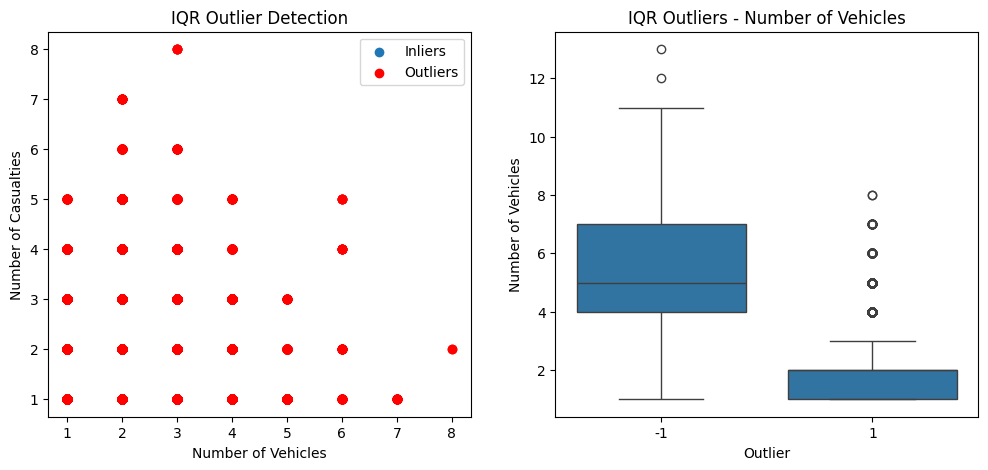

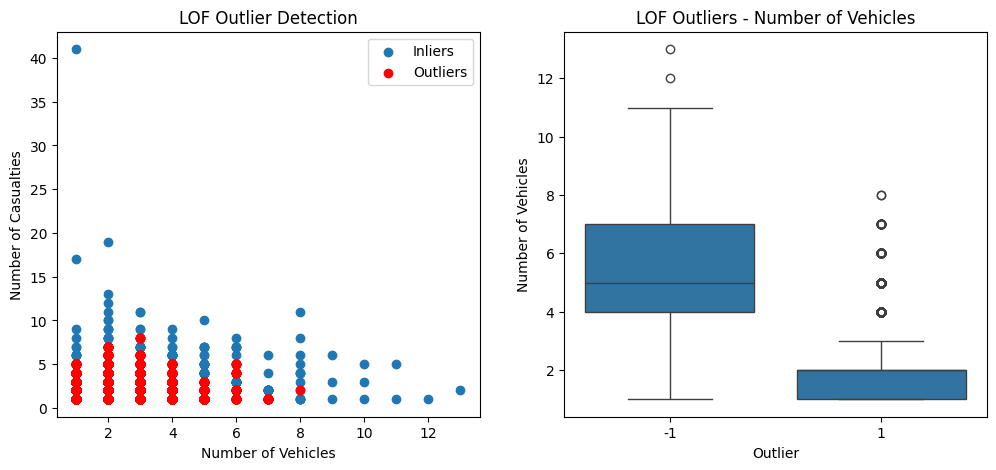

In [102]:

# IQR visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for IQR
ax[0].scatter(accidentDFNew[accidentDFNew['outlier'] == 0]['number_of_vehicles'],
              accidentDFNew[accidentDFNew['outlier'] == 0]['number_of_casualties'],
              label='Inliers')
ax[0].scatter(accidentDFNew[accidentDFNew['outlier'] == 1]['number_of_vehicles'],
              accidentDFNew[accidentDFNew['outlier'] == 1]['number_of_casualties'],
              label='Outliers', color='r')
ax[0].set_title('IQR Outlier Detection')
ax[0].set_xlabel('Number of Vehicles')
ax[0].set_ylabel('Number of Casualties')
ax[0].legend()

# Box plot for IQR
sns.boxplot(data=accidentDFNew, x='outlier', y='number_of_vehicles', ax=ax[1])
ax[1].set_title('IQR Outliers - Number of Vehicles')
ax[1].set_xlabel('Outlier')
ax[1].set_ylabel('Number of Vehicles')

plt.show()

# LOF visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for LOF
ax[0].scatter(accidentDFNew[accidentDFNew['outlier'] == -1]['number_of_vehicles'],
              accidentDFNew[accidentDFNew['outlier'] == -1]['number_of_casualties'],
              label='Inliers')
ax[0].scatter(accidentDFNew[accidentDFNew['outlier'] != -1]['number_of_vehicles'],
              accidentDFNew[accidentDFNew['outlier'] != -1]['number_of_casualties'],
              label='Outliers', color='r')
ax[0].set_title('LOF Outlier Detection')
ax[0].set_xlabel('Number of Vehicles')
ax[0].set_ylabel('Number of Casualties')
ax[0].legend()

# Box plot for LOF
sns.boxplot(data=accidentDFNew, x='outlier', y='number_of_vehicles', ax=ax[1])
ax[1].set_title('LOF Outliers - Number of Vehicles')
ax[1].set_xlabel('Outlier')
ax[1].set_ylabel('Number of Vehicles')

plt.show()

In [103]:
from folium.plugins import MarkerCluster

# IQR Map Visualization
iqr_map = folium.Map(location=[accidentDFNew['latitude'].mean(), accidentDFNew['longitude'].mean()], zoom_start=10)

marker_cluster = MarkerCluster().add_to(iqr_map)

for index, row in accidentDFNew.iterrows():
    if row['outlier'] == 0:
        color = 'green'
    else:
        color = 'red'
    folium.Marker([row['latitude'], row['longitude']], popup=f"Accident ID: {index}", icon=folium.Icon(color=color)).add_to(marker_cluster)

# Display the IQR map
iqr_map


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from IPython.display import display
display(iqr_map)

In [ ]:
# LOF Map Visualization
lof_map = folium.Map(location=[accidentDFNew['latitude'].mean(), accidentDFNew['longitude'].mean()], zoom_start=10)

marker_cluster = MarkerCluster().add_to(lof_map)

for index, row in accidentDFNew.iterrows():
    if row['outlier'] == -1:
        color = 'green'
    else:
        color = 'red'
    folium.Marker([row['latitude'], row['longitude']], popup=f"Accident ID: {index}", icon=folium.Icon(color=color)).add_to(marker_cluster)

# Display the LOF map
lof_map

### *7. Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?*

In [114]:
accidentDF

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  ...  \
0                      3                   1  ...   
1                      3                   1  ...   
2                      3                   1  ...   
3                      2                   1  ...   
4                      3                   1  ...   
...                  ...                 ...  ...   
91194                  2                   2  ...   
91195                  3                   1  ...   
91196                  2                   2  ...   
91197                  3                   2  ...   
91198                  3                   1  ...   

       pedestrian_crossing_physical_facilities light_conditions  \
0                                            9                1   
1                                            4                1   
2                                            0                4   
3                                            4                4   
4                                            0                4   
...                                        ...              ...   
91194                                        0                1   
91195                                        0                1   
91196                                        0                1   
91197                                        0                1   
91198                                        0                1   

       weather_conditions road_surface_conditions  special_conditions_at_site  \
0                       9                       9                           0   
1                       1                       1                           0   
2                       1                       2                           0   
3                       1                       1                           0   
4                       1                       1                           0   
...                   ...                     ...                         ...   
91194                   1                       1                           0   
91195                   1                       1                           0   
91196                   1        

In [115]:
# Remove rows with missing values to create a clean dataset
accidentDFClean = accidentDF.dropna()

# Create Labels for Classification
# Creating a binary label series, where True represents fatal accidents (accident_severity=1)
y_label = accidentDFClean["accident_severity"].apply(lambda x: x == 1)

# Check Label Distribution
# Count the occurrences of True and False labels in the dataset
label_counts = y_label.value_counts()
print("Label distribution:\n", label_counts)


Label distribution:
 accident_severity
False    89794
True      1391
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'location_northing_osgr'),
  Text(1, 0, 'latitude'),
  Text(2, 0, 'police_force'),
  Text(3, 0, 'number_of_casualties'),
  Text(4, 0, 'local_authority_district'),
  Text(5, 0, 'speed_limit'),
  Text(6, 0, 'junction_control'),
  Text(7, 0, 'second_road_class'),
  Text(8, 0, 'light_conditions'),
  Text(9, 0, 'urban_or_rural_area')])

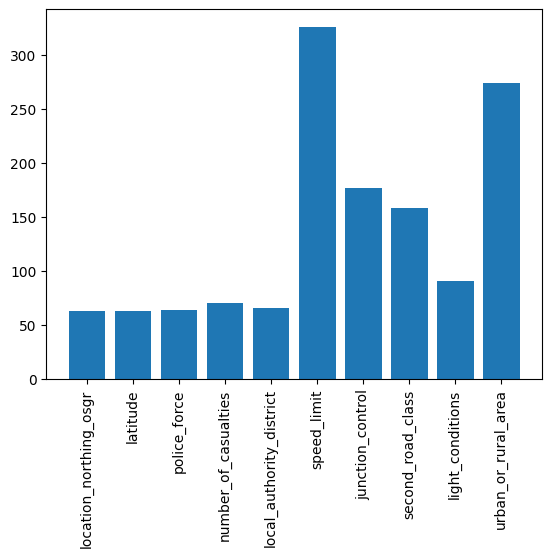

In [116]:
# Data Balancing using RandomUnderSampler
# Import the RandomUnderSampler and use it to balance the data
rus = RandomUnderSampler()
accident_df_clean_balanced, y_label_balanced = rus.fit_resample(accidentDFClean, y_label)

# Data Preparation and Feature Selection
# Drop unnecessary columns and select numerical features for analysis
accident_df_clean_balanced = accident_df_clean_balanced.drop(["accident_severity", "did_police_officer_attend_scene_of_accident"], axis=1)
accident_df_clean_balanced = accident_df_clean_balanced.select_dtypes([np.number])

# Perform Feature Selection using SelectKBest
# Apply SelectKBest with f_classif scoring to select top 10 features
selector = SelectKBest(f_classif, k=10)
selector.fit(accident_df_clean_balanced, y_label_balanced)
selected_features = accident_df_clean_balanced.columns[selector.get_support()]

# Plot Feature Scores
# Visualize the scores of the selected features using a bar plot
scores = selector.scores_[selector.get_support()]
plt.bar(selected_features, scores)
plt.xticks(rotation="vertical")

In [117]:
# Model Training and Cross-validation
# Split the data into train and test sets, initialize DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(accident_df_clean_balanced[selected_features], y_label_balanced, test_size=0.25, random_state=1)
tree = DecisionTreeClassifier(min_samples_leaf=100)

# Perform cross-validation and get accuracy scores
results_tree = cross_validate(tree, X_train, y_train, cv=12, scoring="accuracy", return_estimator=True)
cross_val_scores = results_tree['test_score']
print("Cross-validation scores:", cross_val_scores)

Cross-validation scores: [0.63793103 0.70114943 0.62068966 0.68390805 0.66091954 0.66091954
 0.66091954 0.64942529 0.6954023  0.64367816 0.73988439 0.6300578 ]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



68.5
Model saved as decision_tree_model.joblib


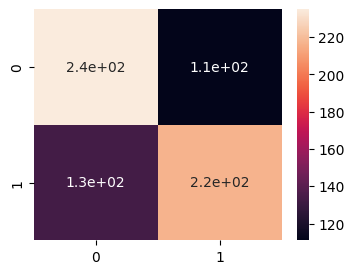

Classification Report:
               precision    recall  f1-score   support

       False       0.64      0.68      0.66       346
        True       0.66      0.62      0.64       350

    accuracy                           0.65       696
   macro avg       0.65      0.65      0.65       696
weighted avg       0.65      0.65      0.65       696



In [118]:
# Step 9: Model Fitting and Evaluation
# Fit the DecisionTreeClassifier on the training data and predict on test data
tree.fit(X_train, y_train)
Y_pred = tree.predict(X_test)

# Calculate and display accuracy of the Decision Tree model
acc_dtree = round(tree.score(X_train, y_train) * 100, 2)

print(acc_dtree)

import joblib

# Save the trained model to a file
model_filename = 'decision_tree_model.joblib'
joblib.dump(tree, model_filename)

print(f"Model saved as {model_filename}")

# Step 10: Confusion Matrix and Classification Report
# Plot confusion matrix and print classification report
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True)
plt.show()
print("Classification Report:\n", classification_report(y_test, Y_pred))

In [119]:
from sklearn.tree import export_text

# Fit the decision tree classifier to your data (X_train, y_train)

# Generate text representation of the decision tree
tree_rules_text = export_text(tree, feature_names=selected_features.tolist())

# Display the text representation
print("Decision Tree Rules:")
print(tree_rules_text)

Decision Tree Rules:
|--- speed_limit <= 45.00
|   |--- police_force <= 4.50
|   |   |--- local_authority_district <= 12.50
|   |   |   |--- class: False
|   |   |--- local_authority_district >  12.50
|   |   |   |--- latitude <= 51.55
|   |   |   |   |--- class: False
|   |   |   |--- latitude >  51.55
|   |   |   |   |--- class: False
|   |--- police_force >  4.50
|   |   |--- light_conditions <= 2.50
|   |   |   |--- junction_control <= 2.50
|   |   |   |   |--- location_northing_osgr <= 353644.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- location_northing_osgr >  353644.50
|   |   |   |   |   |--- class: False
|   |   |   |--- junction_control >  2.50
|   |   |   |   |--- location_northing_osgr <= 360791.00
|   |   |   |   |   |--- local_authority_district <= 494.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- local_authority_district >  494.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |--- location_northing_osgr >  360791.00
|

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



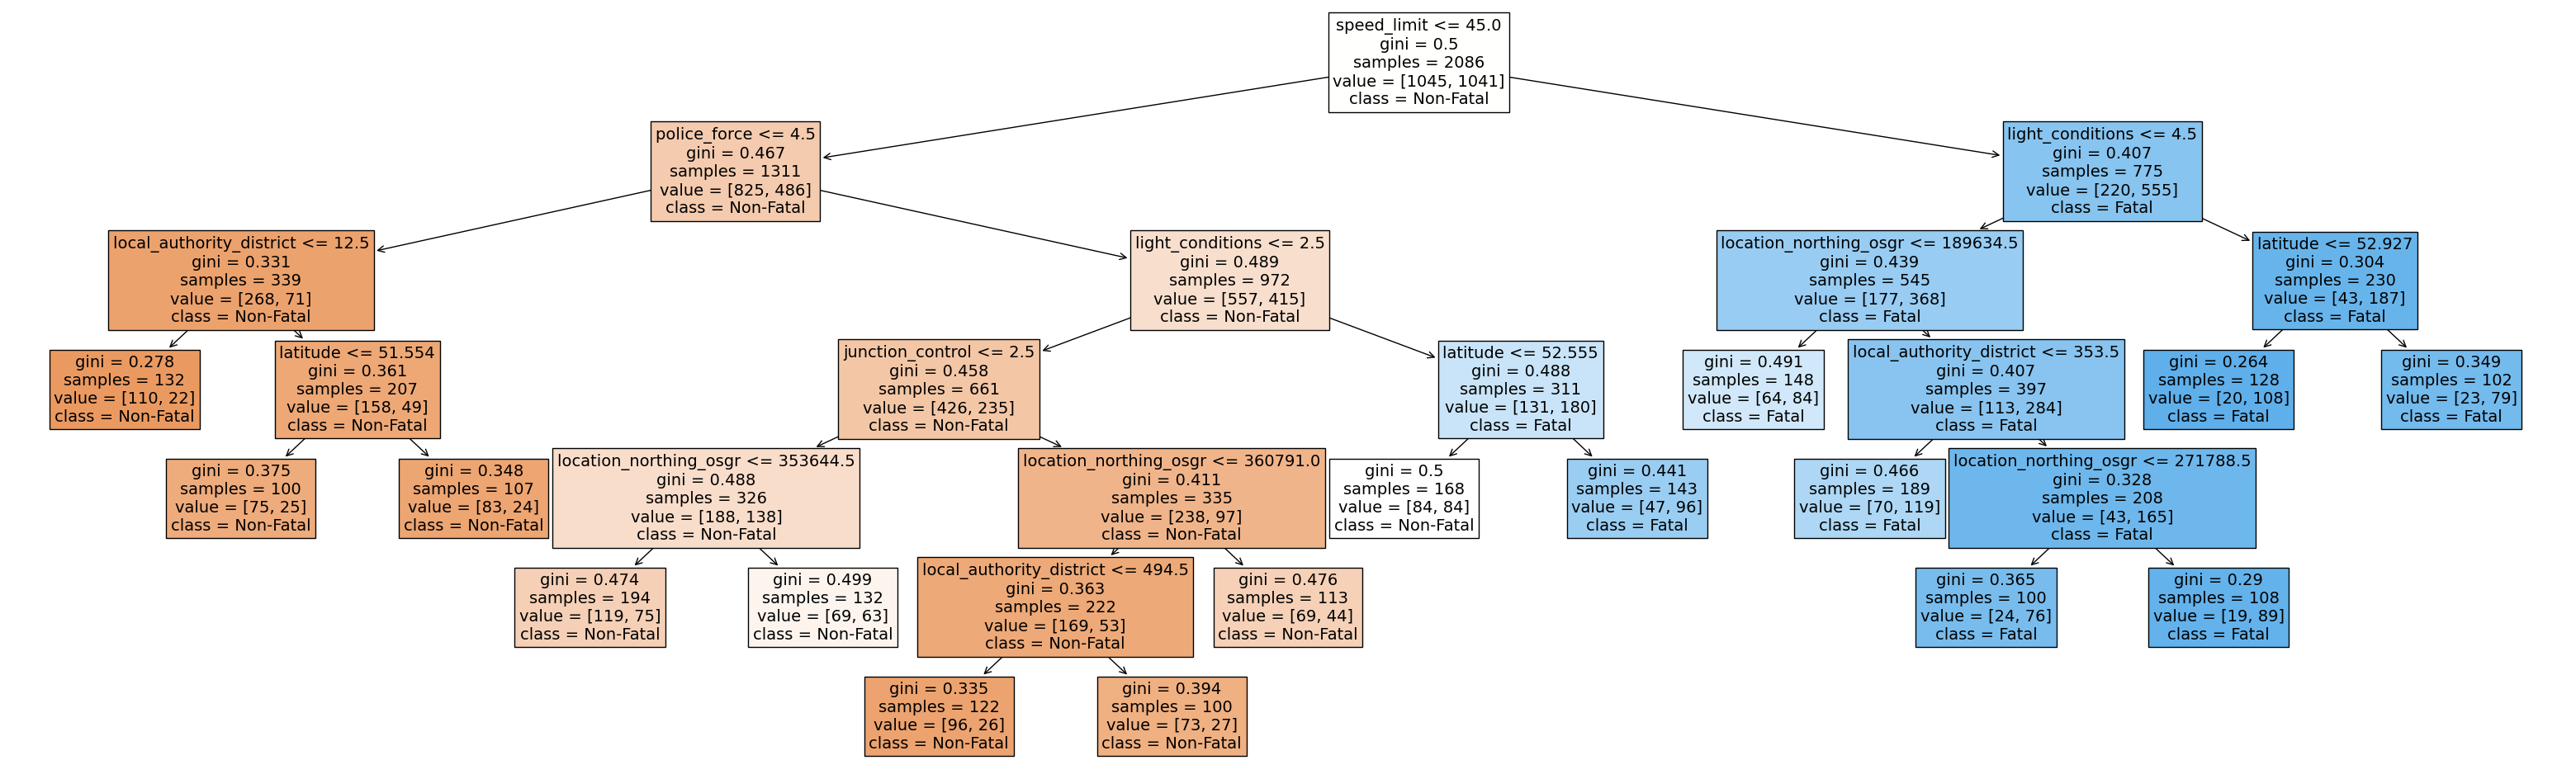

In [120]:
# Step 11: Plot Decision Tree
# Assuming you have already fitted the classifier on your data (X_train, y_train)
# Plot the decision tree with specified class names and feature names
plt.figure(figsize=(40, 12))
plot_tree(tree, feature_names=selected_features, class_names=["Non-Fatal", "Fatal"], fontsize=14, filled=True)
plt.show()

In [121]:
# Separate features and target variable
X = accidentDFClean.drop('accident_severity', axis=1)
y = accidentDFClean['accident_severity']

# Convert categorical variables to numeric using OneHotEncoder with sparse output
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns

onehot_encoder = OneHotEncoder(drop='first')
X_categorical = onehot_encoder.fit_transform(X[categorical_cols])
X_numerical = X[numerical_cols].values

# Combine sparse categorical and numerical features
X_combined = hstack([X_categorical, X_numerical])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Feature scaling for numerical features
scaler = StandardScaler(with_mean=False)  # with_mean=False to avoid issues with sparse matrices
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### Naive Bayes

Naive Bayes Evaluation
Accuracy: 0.5063333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.69      0.58      1508
           1       0.51      0.32      0.39      1492

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.49      3000
weighted avg       0.51      0.51      0.49      3000

ROC-AUC Score: 0.5053468187539557


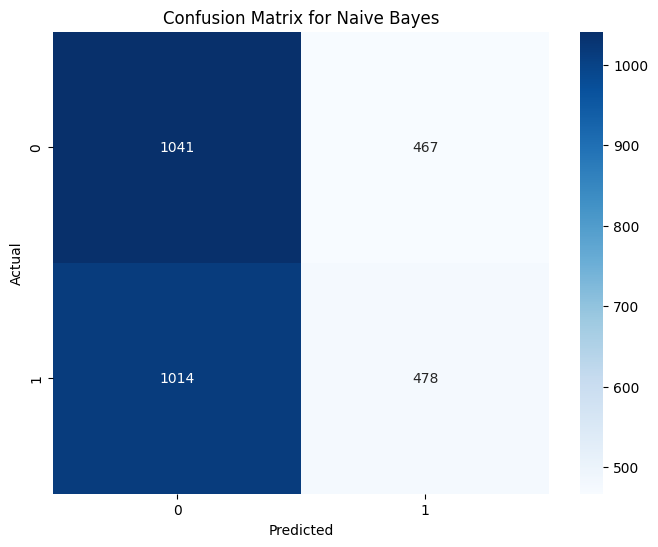

5103

In [6]:
# First, ensure the necessary libraries are installed
!pip install scikit-learn pandas numpy seaborn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import gc

# Replace this with your actual dataset loading
# For example, use pd.read_csv('your_data.csv')
# Here we'll create a sample dataframe for demonstration
df = pd.DataFrame({
    'feature1': np.random.rand(10000),
    'feature2': np.random.rand(10000),
    'target': np.random.randint(0, 2, size=10000)
})

# Separate features and target
X = df[['feature1', 'feature2']]
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset - only if you're using models sensitive to scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to sparse matrix if desired, for memory efficiency - Optional
# from scipy import sparse
# X_train_sparse = sparse.csr_matrix(X_train_scaled)
# X_test_sparse = sparse.csr_matrix(X_test_scaled)

# Garbage collection
gc.collect()

# Now, using GaussianNB
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Evaluation")
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_nb)}')
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_nb)}')

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Clear variables and run garbage collection again
del X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled
gc.collect()

#### RANDOM FOREST

Random Forest Evaluation
Accuracy: 0.498
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1017
           1       0.49      0.46      0.48       983

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

ROC-AUC Score: 0.497446762114251


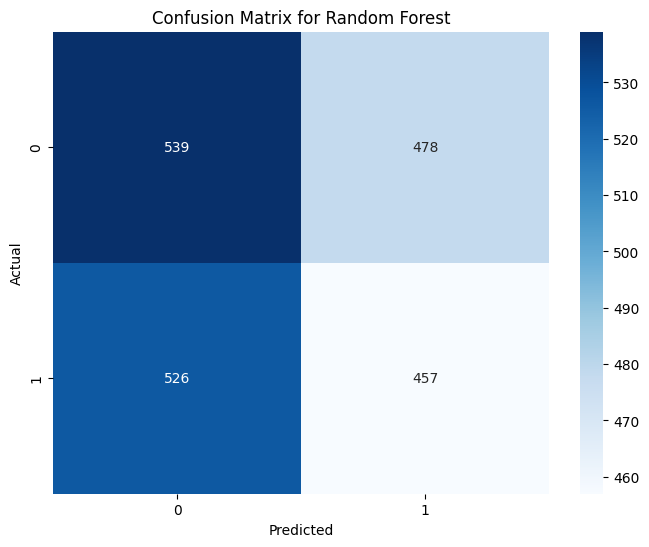

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Example Data Preparation (replace with your actual data)
# Assuming df is your DataFrame with features and target
# df = pd.read_csv('your_data.csv')

# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['target'])  # Replace 'target' with your actual target column name
y = df['target']  # Replace 'target' with your actual target column name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a smaller sample size for demonstration
X_train_small = X_train_scaled[np.random.choice(X_train_scaled.shape[0], size=int(0.5 * X_train_scaled.shape[0]), replace=False)]
y_train_small = y_train.sample(n=X_train_small.shape[0], random_state=42).values  # Sampling y with the same indices

rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Reduce n_estimators and max_depth
rf_model.fit(X_train_small, y_train_small)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Evaluation")
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred_rf)}')
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_rf)}')

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))  # Specify a figure size
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### XGBoost

XGBoost Evaluation
Accuracy: 0.4855
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.50      0.50      1017
           1       0.48      0.47      0.47       983

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

ROC-AUC Score: 0.4852407345722914


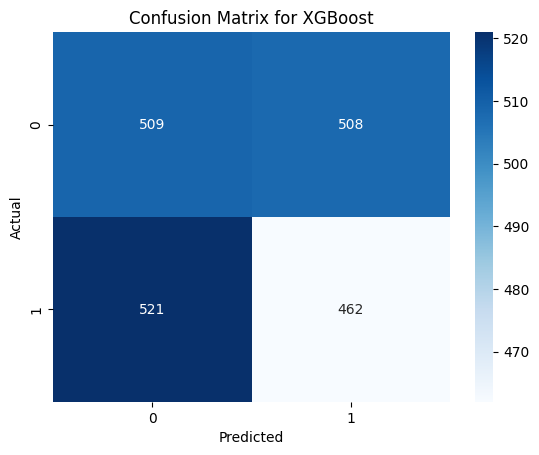

In [11]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Evaluation")
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_xgb)}')
print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred_xgb)}')

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# Close the connection to the database
cursor.close()